In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data load

In [4]:
# loading dataset

train_df = pd.read_csv('/kaggle/input/440-project/train.csv')
test_df = pd.read_csv('/kaggle/input/440-project/test.csv')

display(train_df.head())
display(test_df.head())

QA Text                  Class
0  Question Title:\nWhat are the names of the 206...  Science & Mathematics
1  Question Title:\ncan you tell me the universit...  Education & Reference
2  Question Title:\nSuggestions or Advice on trac...  Politics & Government
3  Question Title:\nwhere can i find the system o...  Entertainment & Music
4  Question Title:\nwill the first tour match bet...                 Sports

QA Text                  Class
0  Question Title:\nWhy does Zebras have stripes?...  Science & Mathematics
1  Question Title:\nWhat did the itsy bitsy sipde...  Education & Reference
2  Question Title:\nWhat is the difference betwee...  Education & Reference
3  Question Title:\nWhy do women get PMS?\nQuesti...                 Health
4  Question Title:\nIf your co-worker is guilty o...                 Health

In [5]:
# Display basic information about the datasets
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Training data shape: (279999, 2)
Test data shape: (59999, 2)


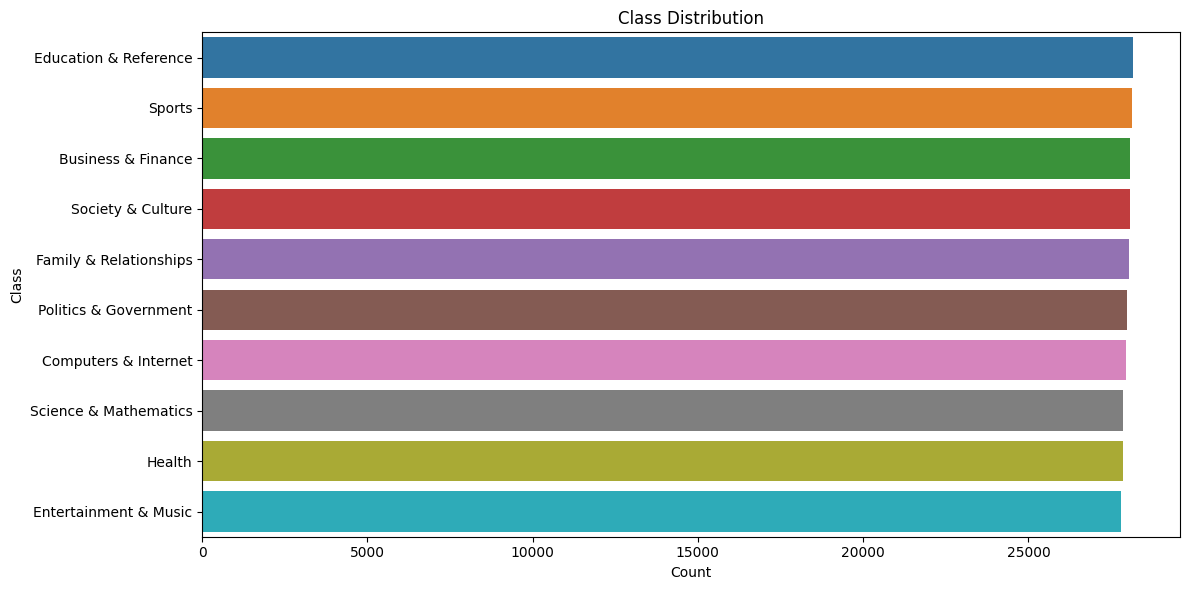

Missing values:
 QA Text    0
Class      0
dtype: int64

Duplicate rows: 0

Text length stats:
           char_count     word_count
count  279999.000000  279999.000000
mean      568.165726      97.586124
std       579.639716      98.919910
min        60.000000       7.000000
25%       222.000000      37.000000
50%       386.000000      66.000000
75%       687.000000     120.000000
max      7928.000000    1416.000000


In [7]:
class_counts = train_df['Class'].value_counts()

# Missing Values and Duplicates
missing_values = train_df.isnull().sum()
duplicate_rows = train_df.duplicated().sum()

# Word and Character Counts
train_df['char_count'] = train_df['QA Text'].apply(len)
train_df['word_count'] = train_df['QA Text'].apply(lambda x: len(x.split()))

length_stats = train_df[['char_count', 'word_count']].describe()

# Plot Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Class', data=train_df, order=class_counts.index)
plt.title("Class Distribution")
plt.xlabel("Count")
plt.ylabel("Class")
plt.tight_layout()
plt.show()

# Print summary info
print("Missing values:\n", missing_values)
print("\nDuplicate rows:", duplicate_rows)
print("\nText length stats:\n", length_stats)

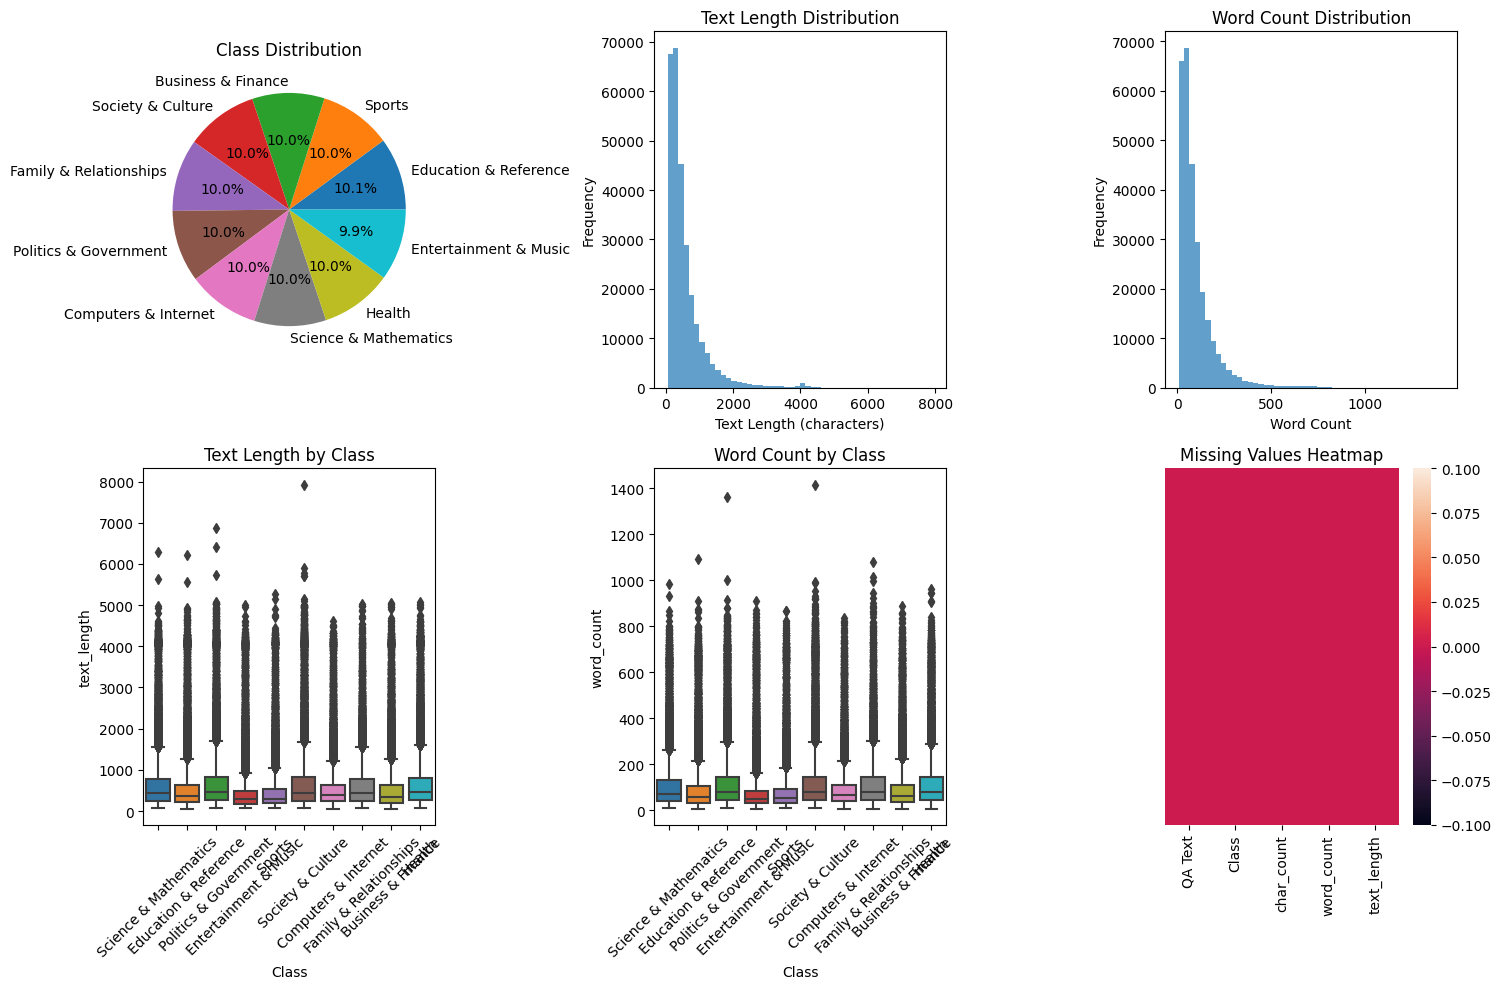

In [8]:

plt.figure(figsize=(15, 10))

# 1. Class distribution
plt.subplot(2, 3, 1)
class_counts = train_df['Class'].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')

# 2. Text length distribution (use original text)
train_df['text_length'] = train_df['QA Text'].str.len()  # Fixed: use 'QA Text' instead of 'clean_text'
plt.subplot(2, 3, 2)
plt.hist(train_df['text_length'], bins=50, alpha=0.7)
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')

# 3. Word count distribution (use original text)
train_df['word_count'] = train_df['QA Text'].str.split().str.len()  # Fixed: use 'QA Text'
plt.subplot(2, 3, 3)
plt.hist(train_df['word_count'], bins=50, alpha=0.7)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')

# 4. Class vs Text Length
plt.subplot(2, 3, 4)
sns.boxplot(data=train_df, x='Class', y='text_length')
plt.xticks(rotation=45)
plt.title('Text Length by Class')

# 5. Class vs Word Count
plt.subplot(2, 3, 5)
sns.boxplot(data=train_df, x='Class', y='word_count')
plt.xticks(rotation=45)
plt.title('Word Count by Class')

# 6. Missing values heatmap
plt.subplot(2, 3, 6)
sns.heatmap(train_df.isnull(), cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap')

plt.tight_layout()
plt.show()

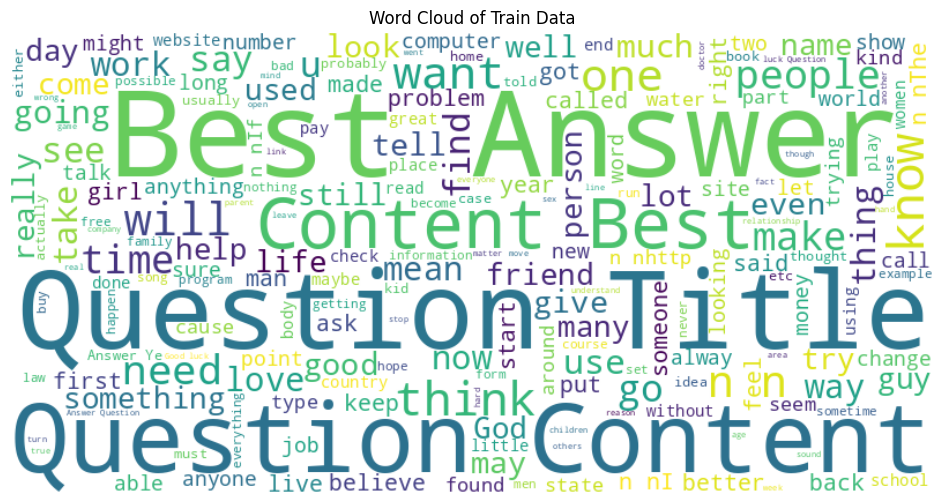

In [9]:
from wordcloud import WordCloud

# Join all tokens into one big string
all_words = ' '.join(train_df['QA Text'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Train Data")
plt.show()

# PreProcessing

In [6]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
tqdm.pandas()

In [9]:
stop_words = list(stopwords.words('english'))
stop_words.append("question")
stop_words.append("title")
stop_words.append("content")
stop_words.append("answer")

In [10]:
def clean_text(text):
    # Convert to string and handle potential non-string types
    text = str(text) if not isinstance(text, str) else text

    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming and lemmatization
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return tokens

# Apply to train
train_df['clean_tokens'] = train_df['QA Text'].apply(clean_text)
test_df['clean_tokens'] = test_df['QA Text'].apply(clean_text)

In [11]:
# Convert list of tokens into a cleaned string for both train and test
train_df['clean_text'] = train_df['clean_tokens'].apply(lambda tokens: ' '.join(tokens))
test_df['clean_text'] = test_df['clean_tokens'].apply(lambda tokens: ' '.join(tokens))

In [10]:
test_df.head()

QA Text                  Class  \
0  Question Title:\nWhy does Zebras have stripes?...  Science & Mathematics   
1  Question Title:\nWhat did the itsy bitsy sipde...  Education & Reference   
2  Question Title:\nWhat is the difference betwee...  Education & Reference   
3  Question Title:\nWhy do women get PMS?\nQuesti...                 Health   
4  Question Title:\nIf your co-worker is guilty o...                 Health   

                                        clean_tokens  \
0  [zebra, stripe, purpose, stripe, serve, zebra,...   
1     [itsy, bitsy, sipder, climb, best, waterspout]   
2  [difference, bachelor, master, degree, best, o...   
3  [woman, get, pm, best, premenstrual, syndrome,...   
4  [coworker, guilty, unsanitary, hygiene, would,...   

                                          clean_text  
0  zebra stripe purpose stripe serve zebra wild l...  
1            itsy bitsy sipder climb best waterspout  
2  difference bachelor master degree best one dif...  
3  woman get pm best premenstrual syndrome pm gro...  
4  coworker guilty unsanitary hygiene would right...

In [11]:
# View cleaned text
print("Train Clean Text Sample:\n")
print(train_df[[ 'clean_text','Class']].head())
print(test_df[[ 'clean_text','Class']].head())

Train Clean Text Sample:

                                          clean_text                  Class
0  name 206 bone human body best 206 bone human b...  Science & Mathematics
1  tell university name distance mphil food nutri...  Education & Reference
2  suggestion advice tracking someone owes money ...  Politics & Government
3  find system poem victim written guitarist band...  Entertainment & Music
4  first tour match india south africa telecast c...                 Sports
                                          clean_text                  Class
0  zebra stripe purpose stripe serve zebra wild l...  Science & Mathematics
1            itsy bitsy sipder climb best waterspout  Education & Reference
2  difference bachelor master degree best one dif...  Education & Reference
3  woman get pm best premenstrual syndrome pm gro...                 Health
4  coworker guilty unsanitary hygiene would right...                 Health


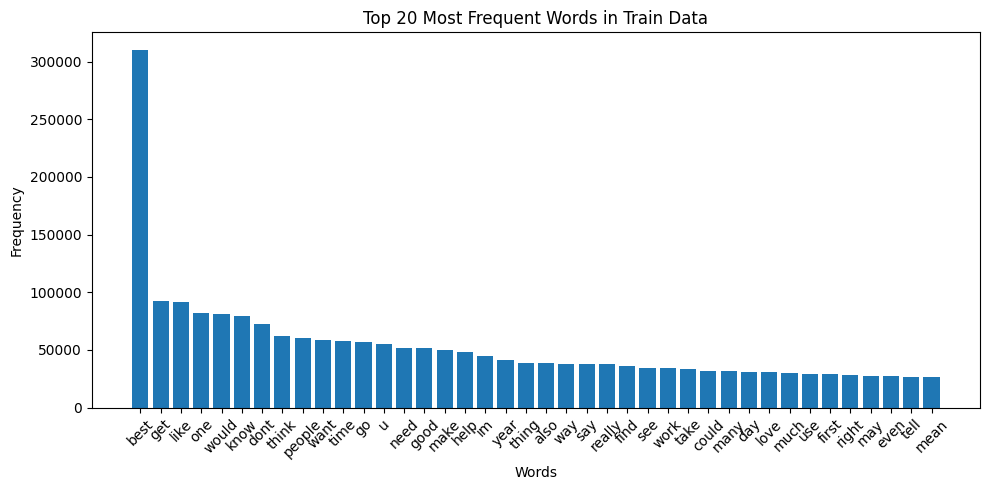

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all tokens from train
all_tokens = [token for tokens in train_df['clean_tokens'] for token in tokens]
token_counts = Counter(all_tokens)
most_common = token_counts.most_common(40)

# Plot
words, counts = zip(*most_common)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Train Data")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


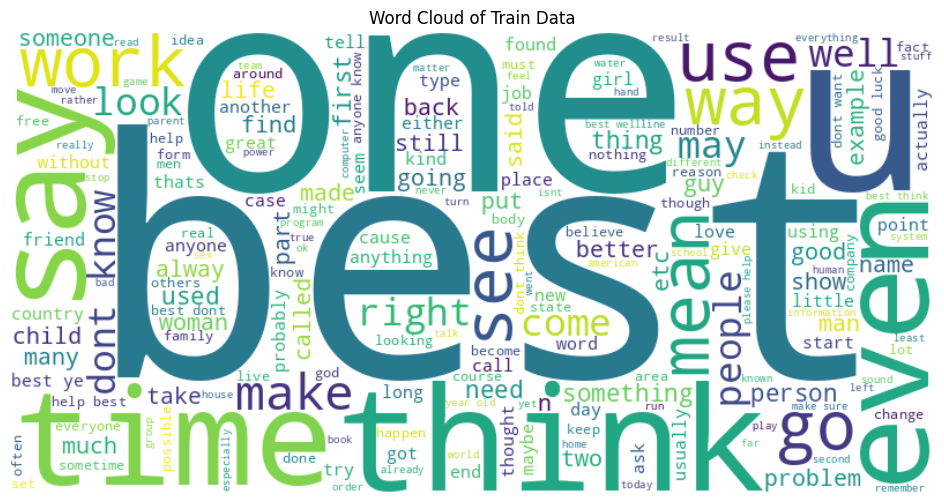

In [19]:

from wordcloud import WordCloud

# Join all tokens into one big string
all_words = ' '.join(train_df['clean_text'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Train Data")
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Class_E'] = le.fit_transform(train_df['Class'])
test_df['Class_E'] = le.fit_transform(test_df['Class'])
# Check mapping of original labels to numbers
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Business & Finance': 0, 'Computers & Internet': 1, 'Education & Reference': 2, 'Entertainment & Music': 3, 'Family & Relationships': 4, 'Health': 5, 'Politics & Government': 6, 'Science & Mathematics': 7, 'Society & Culture': 8, 'Sports': 9}


In [13]:
X = train_df['clean_text']
y = train_df['Class_E']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y) #validation split

In [15]:
X_test = test_df['clean_text']
y_test = test_df['Class_E']

# Word Embeddings

BoW

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize BoW vectorizer
bow_vectorizer = CountVectorizer(max_features=2000)

# Fit and transform training data
X_train_bow = bow_vectorizer.fit_transform(X_train)

# Transform validation data (use transform, not fit_transform)
X_val_bow = bow_vectorizer.transform(X_val)  # Add your validation texts variable here
X_test_bow = bow_vectorizer.transform(X_test)

# Create DataFrame from training data
bow_df = pd.DataFrame(X_train_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

tfidf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=2000,        # was 2000
    ngram_range=(1,2),         # add bigrams
    min_df=3, max_df=0.9,      # trim rare/too-common terms
    sublinear_tf=True          # helps linear models
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf   = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

GloVe

In [15]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("danielwillgeorge/glove6b100dtxt")
glove_file = f"{path}/glove.6B.100d.txt"
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/glove6b100dtxt


In [16]:
# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

embeddings = load_glove_embeddings(glove_file)
print(f"Loaded {len(embeddings)} word vectors.")

Loaded 400000 word vectors.


In [17]:

# Average GloVe vectors per text
def get_glove_embedding(text_tokens, embeddings, dim=100):
    vectors = []
    for word in text_tokens:
        if word in embeddings:
            vectors.append(embeddings[word])
    
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

# Apply GloVe embeddings to training data
print("Processing training data...")
X_train_glove = np.array([
    get_glove_embedding(tokens, embeddings) 
    for tokens in tqdm(X_train, desc="Training embeddings")
])

#Apply GloVe embeddings to val data
print("Processing validation data...")
X_val_glove = np.array([
    get_glove_embedding(tokens, embeddings) 
    for tokens in tqdm(X_val, desc="val embeddings")
])

print("Processing test data with GloVe...")
X_test_glove = np.array([
    get_glove_embedding(tokens, embeddings) 
    for tokens in tqdm(X_test, desc="Test embeddings")
])


Processing training data...


Training embeddings: 100%|██████████| 251999/251999 [00:35<00:00, 7124.34it/s]


Processing validation data...


val embeddings: 100%|██████████| 28000/28000 [00:03<00:00, 7230.21it/s]


Processing test data with GloVe...


Test embeddings: 100%|██████████| 59999/59999 [00:08<00:00, 7145.83it/s]


In [29]:
!pip install gensim

**SkipGram**

In [18]:
from gensim.models import Word2Vec

# Train Word2Vec skip-gram model
w2v_model = Word2Vec(sentences=train_df['clean_tokens'], vector_size=100, window=5, min_count=1, sg=1)

# Average Word2Vec vectors per text
def get_w2v_embedding(tokens, model, dim=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

X_train_w2v = np.array([get_w2v_embedding(tokens, w2v_model) for tokens in X_train])
X_val_w2v = np.array([get_w2v_embedding(tokens, w2v_model) for tokens in X_val])
X_test_w2v  = np.array([get_w2v_embedding(tokens, w2v_model) for tokens in X_test])

# Evaluation Function

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    print(f"{model_name} | Accuracy: {acc:.4f} | F1 (Weighted): {f1:.4f}")
    
    # Classification Report
    report = classification_report(
        y_true, y_pred, output_dict=True, digits=4, zero_division=0
    )
    df = pd.DataFrame(report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df.iloc[:-1, :], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"Classification Report - {model_name}")
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    return acc, f1


# Machine Learning Models

Logistic Regression (BoW & TF-IDF)

Logistic Regression val (BoW) | Accuracy: 0.6323 | F1 (Weighted): 0.6286


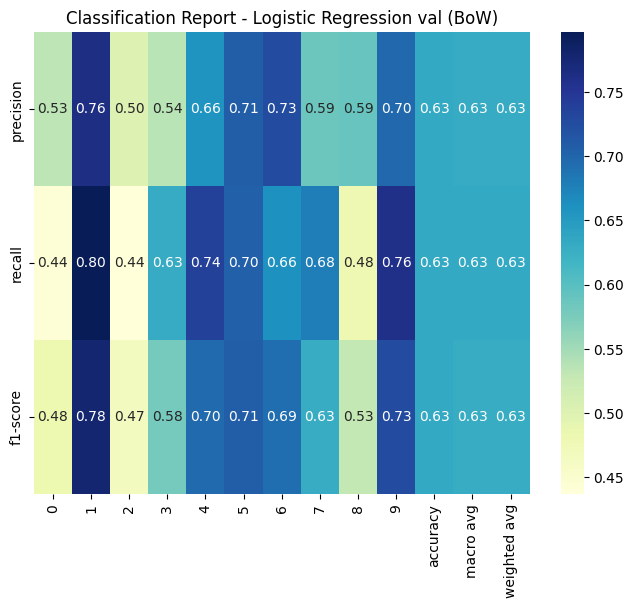

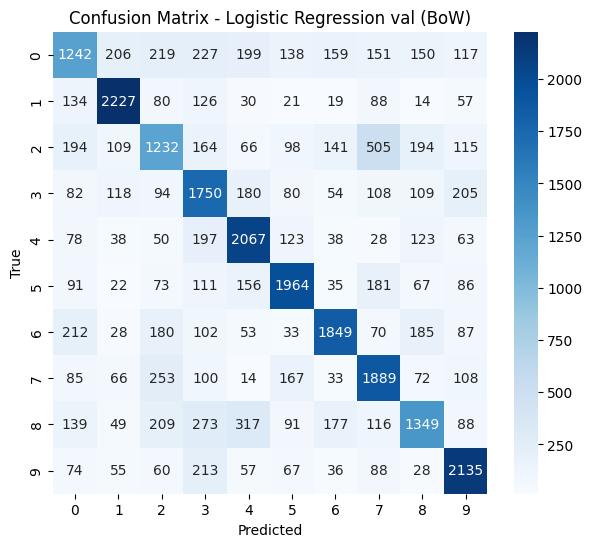

Logistic Regression test (BoW) | Accuracy: 0.6290 | F1 (Weighted): 0.6248


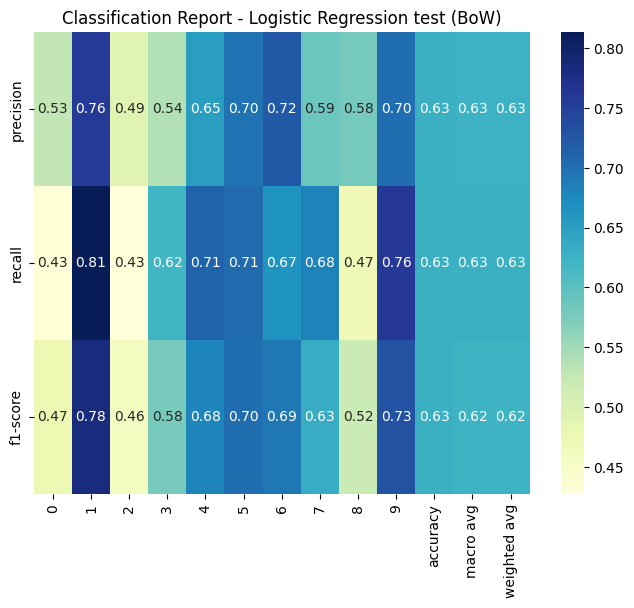

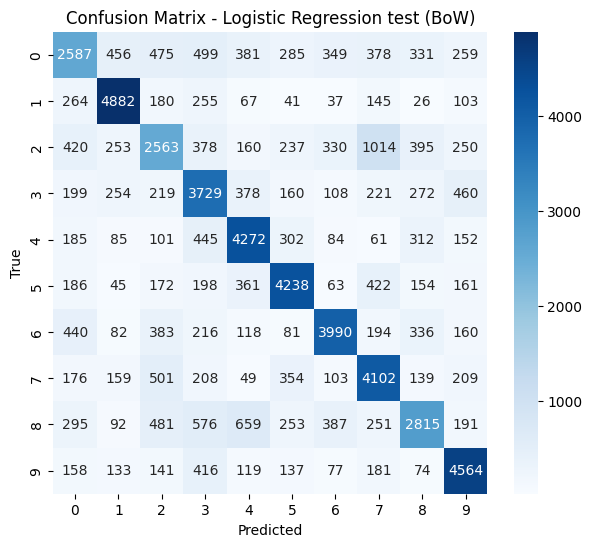

Logistic Regression val (TF-IDF) | Accuracy: 0.6475 | F1 (Weighted): 0.6451


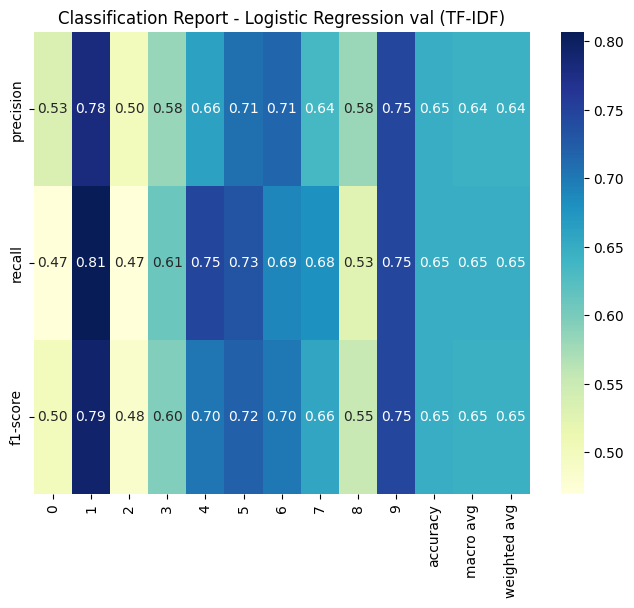

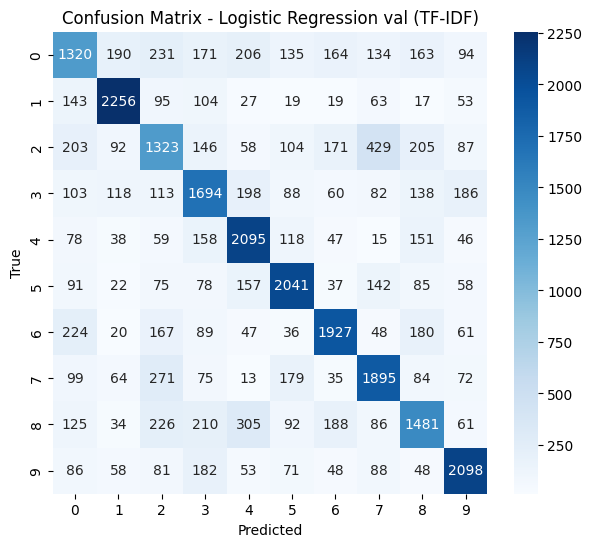

Logistic Regression test (TF-IDF) | Accuracy: 0.6464 | F1 (Weighted): 0.6437


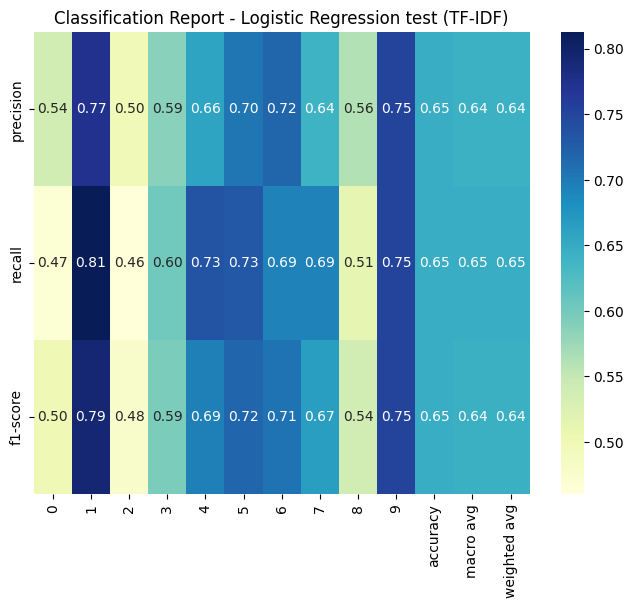

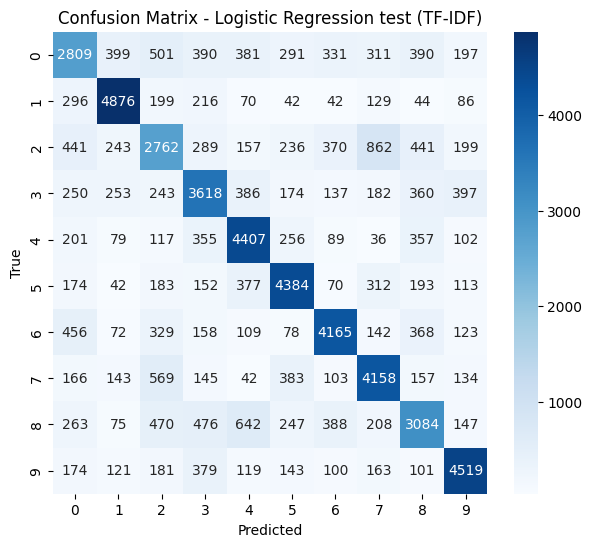

(0.6463774396239937, 0.6436542616345552)

In [20]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression - BoW
log_bow = LogisticRegression(max_iter=5000)
log_bow.fit(X_train_bow, y_train)

# Validation
pred_bow = log_bow.predict(X_val_bow)
evaluate_model(y_val, pred_bow, "Logistic Regression val (BoW)")

# Test
pred_bow_test = log_bow.predict(X_test_bow)
evaluate_model(y_test, pred_bow_test, "Logistic Regression test (BoW)")


# Logistic Regression - TF-IDF
log_tfidf = LogisticRegression(max_iter=5000)
log_tfidf.fit(X_train_tfidf, y_train)

# Validation
pred_tfidf = log_tfidf.predict(X_val_tfidf)
evaluate_model(y_val, pred_tfidf, "Logistic Regression val (TF-IDF)")
# Test
pred_tfidf_test = log_tfidf.predict(X_test_tfidf)
evaluate_model(y_test, pred_tfidf_test, "Logistic Regression test (TF-IDF)")


**NaiveBayes**

Naive Bayes val (BoW) | Accuracy: 0.6262 | F1 (Weighted): 0.6231


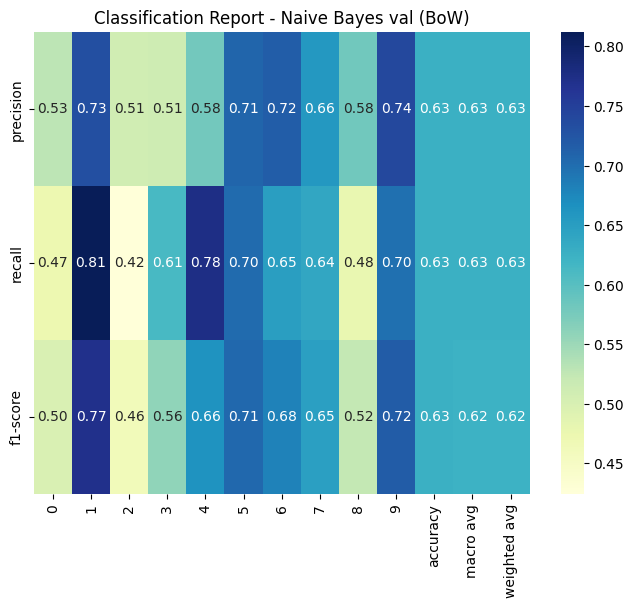

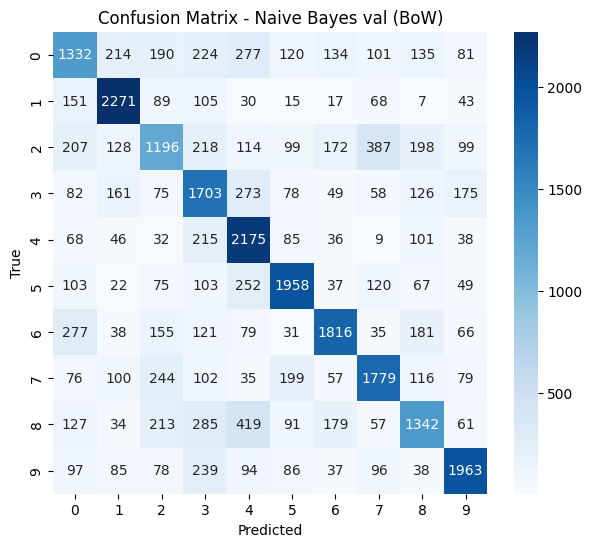

Naive Bayes test (BoW) | Accuracy: 0.6279 | F1 (Weighted): 0.6245


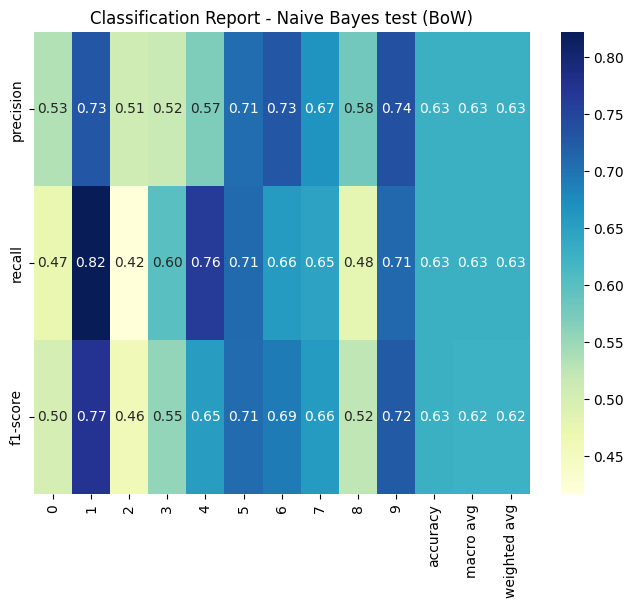

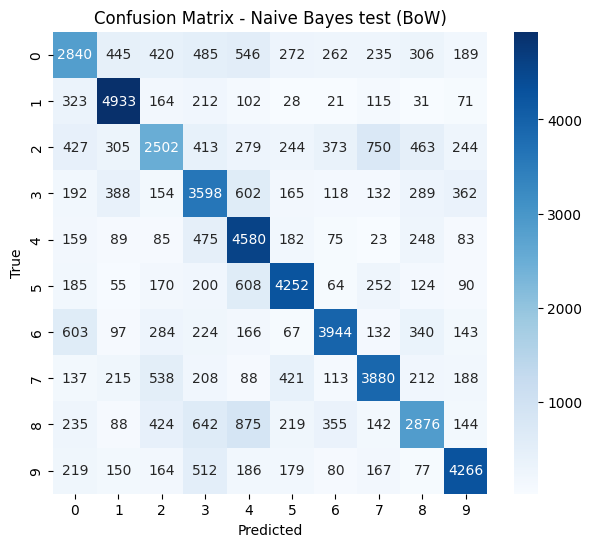

Naive Bayes val (TF-IDF) | Accuracy: 0.6278 | F1 (Weighted): 0.6250


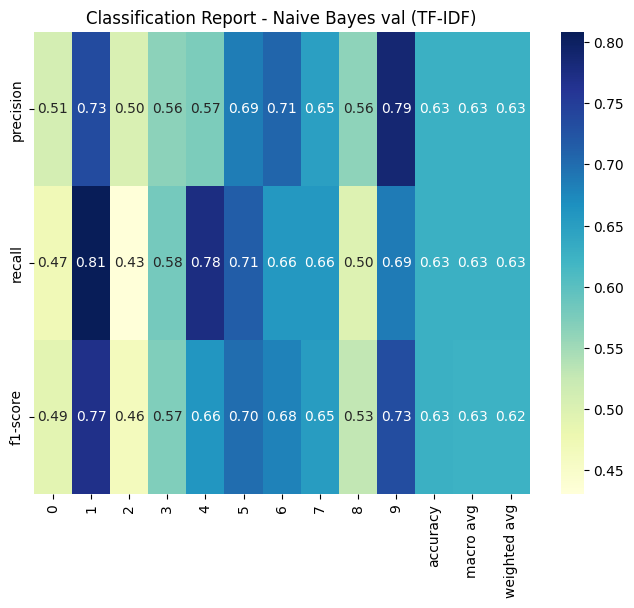

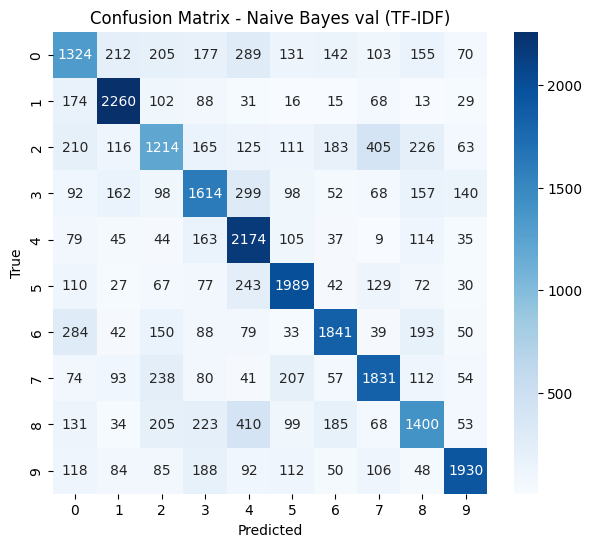

Naive Bayes test (TF-IDF) | Accuracy: 0.6275 | F1 (Weighted): 0.6244


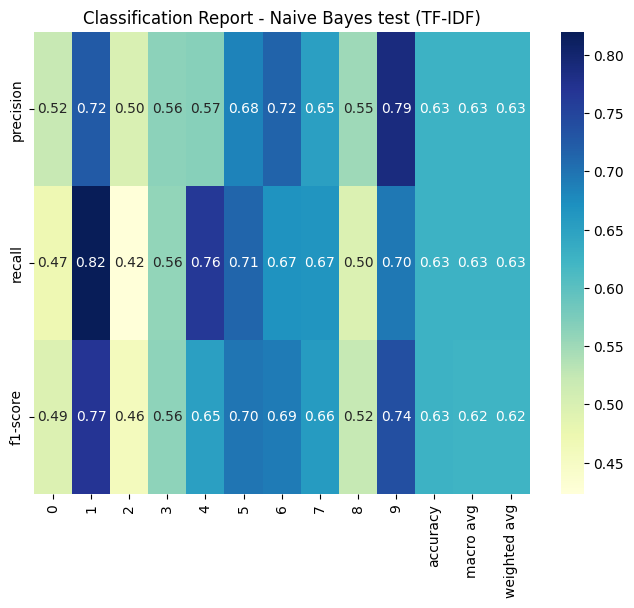

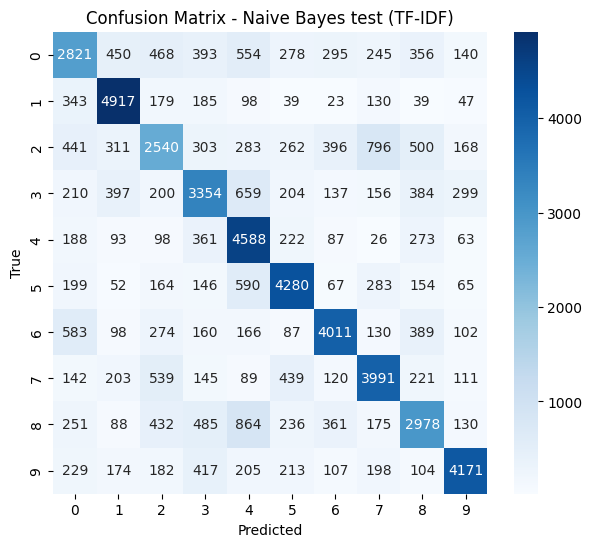

(0.6275271254520909, 0.6243549456306411)

In [20]:
from sklearn.naive_bayes import MultinomialNB

# --- Naive Bayes - BoW ---
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

# Validation
pred_nb_bow = nb_bow.predict(X_val_bow)
evaluate_model(y_val, pred_nb_bow, "Naive Bayes val (BoW)")

# Test
pred_nb_bow_test = nb_bow.predict(X_test_bow)
evaluate_model(y_test, pred_nb_bow_test, "Naive Bayes test (BoW)")


# --- Naive Bayes - TF-IDF ---
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Validation
pred_nb_tfidf = nb_tfidf.predict(X_val_tfidf)
evaluate_model(y_val, pred_nb_tfidf, "Naive Bayes val (TF-IDF)")

# Test
pred_nb_tfidf_test = nb_tfidf.predict(X_test_tfidf)
evaluate_model(y_test, pred_nb_tfidf_test, "Naive Bayes test (TF-IDF)")


**Random Forest**

In [34]:
# random forest
# Random Forest - BoW
from sklearn.ensemble import RandomForestClassifier

rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bow.fit(X_train_bow, y_train)

# Validation
pred_rf_bow = rf_bow.predict(X_val_bow)
evaluate_model(y_val, pred_rf_bow, "Random Forest val (BoW)")

# Test
pred_rf_bow_test = rf_bow.predict(X_test_bow)
evaluate_model(y_test, pred_rf_bow_test, "Random Forest test (BoW)")


# --- Random Forest - TF-IDF ---
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

# Validation
pred_rf_tfidf = rf_tfidf.predict(X_val_tfidf)
evaluate_model(y_val, pred_rf_tfidf, "Random Forest val (TF-IDF)")

# Test
pred_rf_tfidf_test = rf_tfidf.predict(X_test_tfidf)
evaluate_model(y_test, pred_rf_tfidf_test, "Random Forest test (TF-IDF)")

Random Forest val (BoW) | Accuracy: 0.5987 | F1: 0.5940
              precision    recall  f1-score   support

           0       0.48      0.41      0.44      2808
           1       0.70      0.80      0.75      2796
           2       0.47      0.42      0.44      2818
           3       0.55      0.53      0.54      2780
           4       0.57      0.74      0.64      2805
           5       0.65      0.68      0.66      2786
           6       0.66      0.66      0.66      2799
           7       0.60      0.61      0.60      2787
           8       0.55      0.45      0.50      2808
           9       0.72      0.69      0.70      2813

    accuracy                           0.60     28000
   macro avg       0.59      0.60      0.59     28000
weighted avg       0.59      0.60      0.59     28000

Confusion Matrix:
 [[1160  246  245  172  232  134  198  148  163  110]
 [ 134 2245   87   99   32   28   25   78   18   50]
 [ 191  133 1183  186  115  124  208  414  167   97]
 [ 132 

(0.5989933165552759, 0.5940060883549125)

Random Forest val (TF-IDF) | Accuracy: 0.6016 | F1: 0.5966


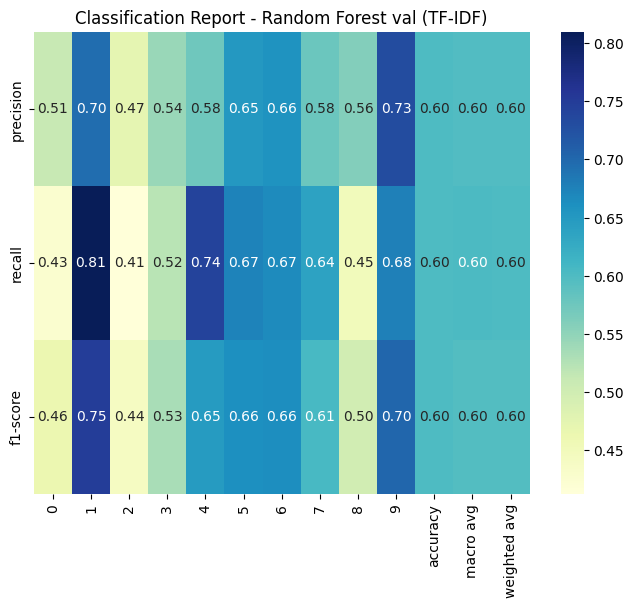

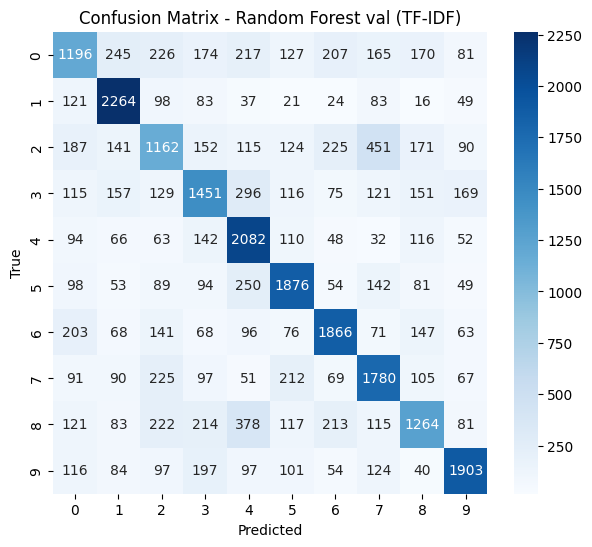

Random Forest test (TF-IDF) | Accuracy: 0.5990 | F1: 0.5940


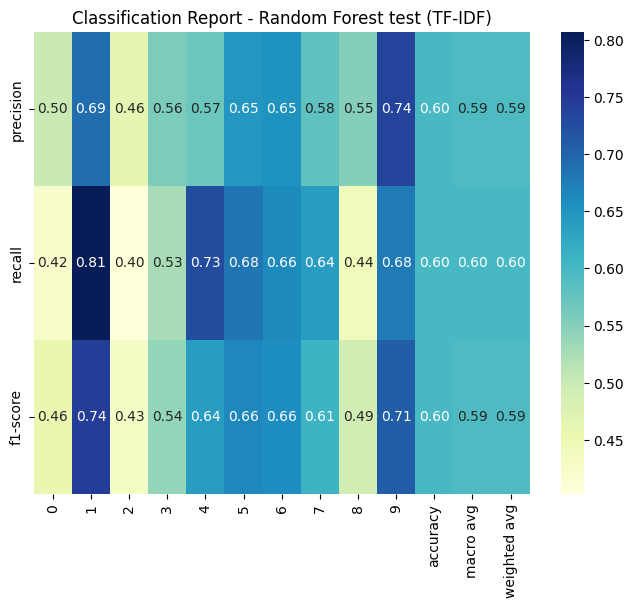

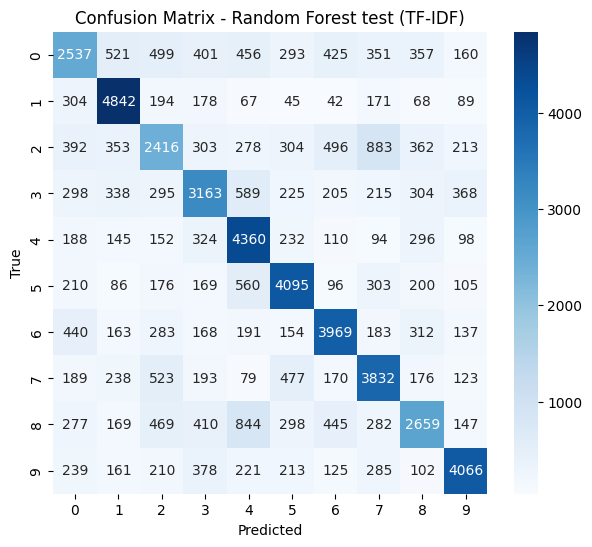

(0.5989933165552759, 0.5940060883549125)

In [59]:
# Validation
pred_rf_tfidf = rf_tfidf.predict(X_val_tfidf)
evaluate_model(y_val, pred_rf_tfidf, "Random Forest val (TF-IDF)")

# Test
pred_rf_tfidf_test = rf_tfidf.predict(X_test_tfidf)
evaluate_model(y_test, pred_rf_tfidf_test, "Random Forest test (TF-IDF)")

# Deep learning Models

In [21]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


2025-09-08 19:04:09.794921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757358250.121322      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757358250.206162      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


**Deep Neural Network**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_dnn(input_dim, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

# For BoW
X_train_in = X_train_bow.toarray()
X_val_in = X_val_bow.toarray()
X_test_in = X_test_bow.toarray()

num_classes = len(label_mapping)
dnn_model = build_dnn(X_train_in.shape[1], num_classes)

dnn_model.fit(X_train_in, y_train, validation_data=(X_val_in, y_val), epochs=10, batch_size=32)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       512,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546,442 (2.08 MB)

 Trainable params: 546,442 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.5582 - loss: 1.3977 - val_accuracy: 0.6463 - val_loss: 1.1095
Epoch 2/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6421 - loss: 1.1275 - val_accuracy: 0.6500 - val_loss: 1.0888
Epoch 3/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6569 - loss: 1.0742 - val_accuracy: 0.6525 - val_loss: 1.0815
Epoch 4/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6654 - loss: 1.0371 - val_accuracy: 0.6530 - val_loss: 1.0836
Epoch 5/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6730 - loss: 1.0154 - val_accuracy: 0.6532 - val_loss: 1.0833
Epoch 6/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6792 - loss: 0.9892 - val_accuracy: 0.6510 - val_loss: 1.0889
Epoch 7/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6840 - loss: 0.9720 - val_accuracy: 0.6520 - val_loss: 1.0888
Epoch 8/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6877 - lo

DNN (BoW) - VALIDATION | Accuracy: 0.6507 | F1 (Weighted): 0.6452


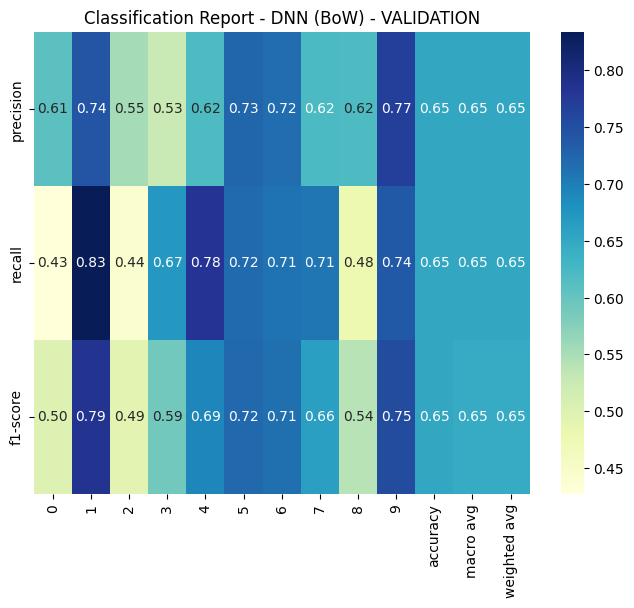

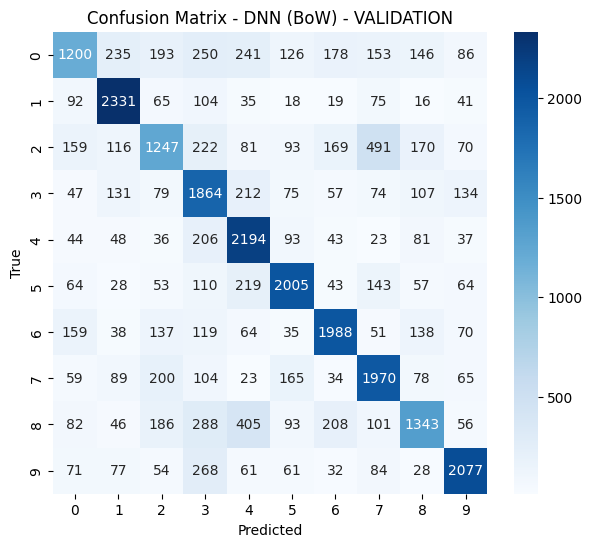

DNN (BoW) - TEST | Accuracy: 0.6499 | F1 (Weighted): 0.6445


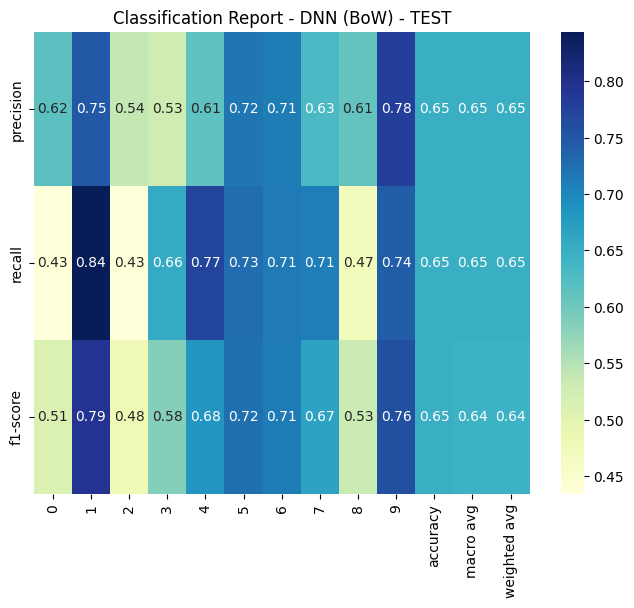

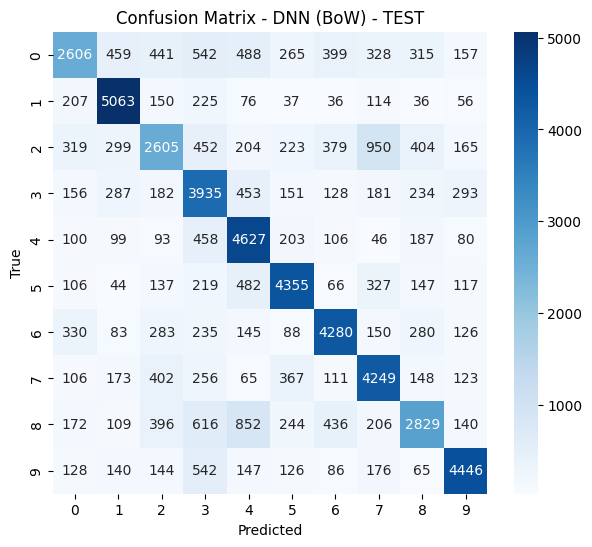

(0.6499274987916466, 0.644467175792409)

In [25]:
# Get predictions
y_val_pred = np.argmax(dnn_model.predict(X_val_in, verbose=0), axis=1)
y_test_pred = np.argmax(dnn_model.predict(X_test_in, verbose=0), axis=1)

evaluate_model(y_val, y_val_pred, model_name="DNN (BoW) - VALIDATION")
evaluate_model(y_test, y_test_pred, model_name="DNN (BoW) - TEST")

In [26]:
# For tfidf
X_train_in = X_train_tfidf.toarray()
X_val_in = X_val_tfidf.toarray()
X_test_in = X_test_tfidf.toarray()

num_classes = len(label_mapping)
dnn_model = build_dnn(X_train_in.shape[1], num_classes)
dnn_model.fit(X_train_in, y_train, validation_data=(X_val_in, y_val), epochs=10, batch_size=32)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.5799 - loss: 1.3199 - val_accuracy: 0.6479 - val_loss: 1.0826
Epoch 2/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6520 - loss: 1.0916 - val_accuracy: 0.6531 - val_loss: 1.0695
Epoch 3/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6633 - loss: 1.0446 - val_accuracy: 0.6528 - val_loss: 1.0644
Epoch 4/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6737 - loss: 1.0113 - val_accuracy: 0.6530 - val_loss: 1.0661
Epoch 5/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6826 - loss: 0.9802 - val_accuracy: 0.6549 - val_loss: 1.0657
Epoch 6/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6886 - loss: 0.9596 - val_accuracy: 0.6536 - val_loss: 1.0695
Epoch 7/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6934 - loss: 0.9377 - val_accuracy: 0.6513 - val_loss: 1.0771
Epoch 8/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7006 - loss: 0

DNN (tfidf) - VALIDATION | Accuracy: 0.6538 | F1 (Weighted): 0.6491


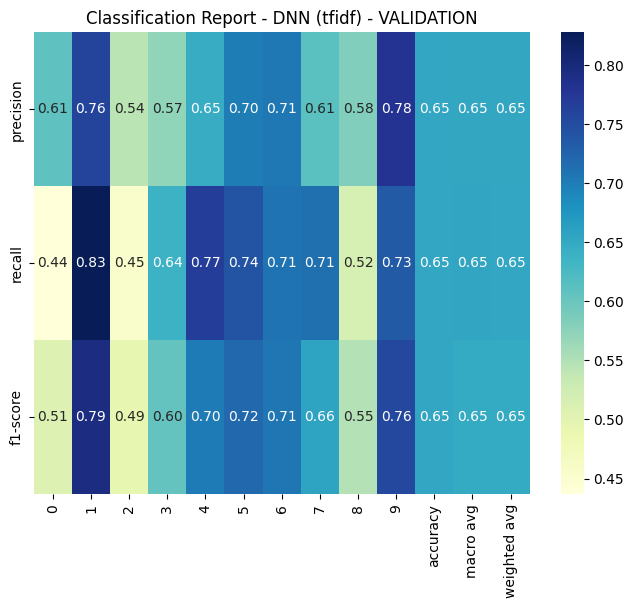

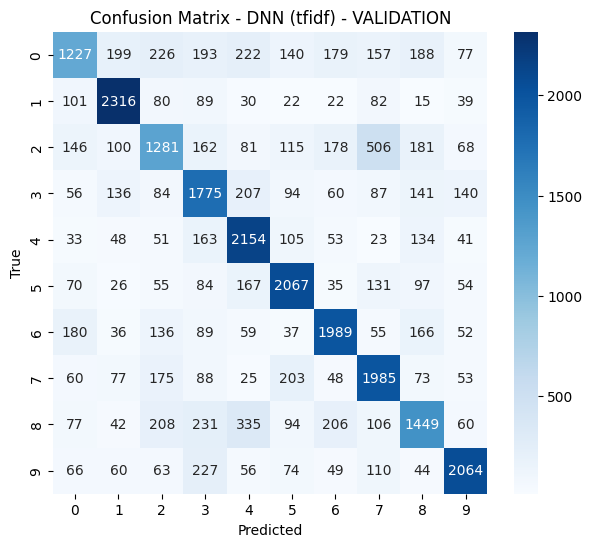

DNN (tfidf) - TEST | Accuracy: 0.6513 | F1 (Weighted): 0.6465


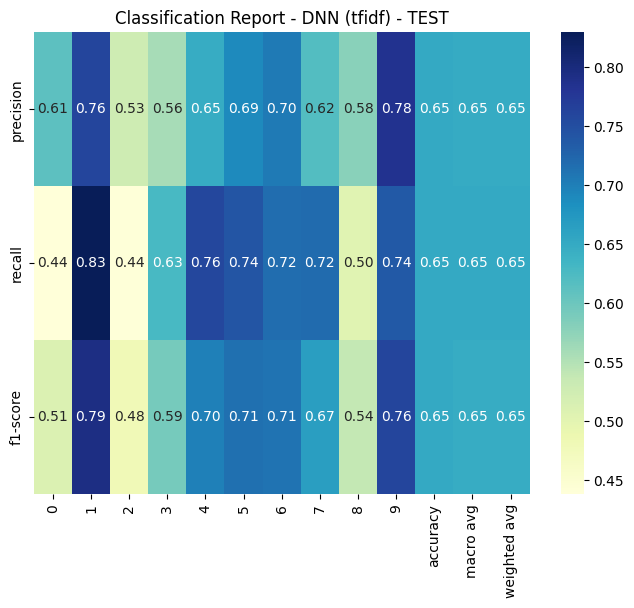

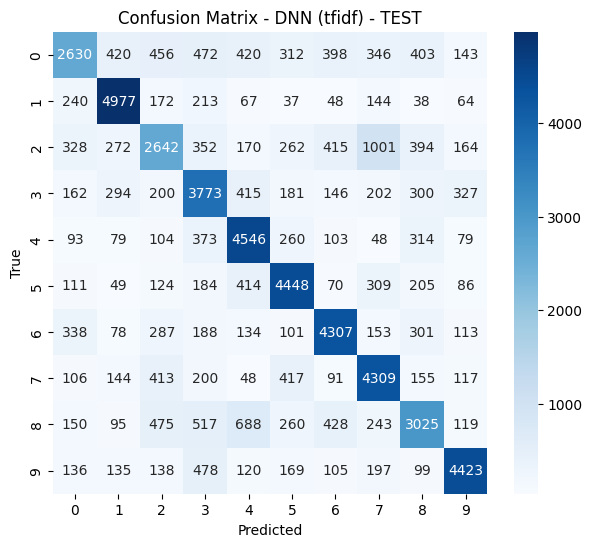

(0.6513441890698178, 0.6464722636117106)

In [27]:
# Get predictions
y_val_pred = np.argmax(dnn_model.predict(X_val_in, verbose=0), axis=1)
y_test_pred = np.argmax(dnn_model.predict(X_test_in, verbose=0), axis=1)

evaluate_model(y_val, y_val_pred, model_name="DNN (tfidf) - VALIDATION")
evaluate_model(y_test, y_test_pred, model_name="DNN (tfidf) - TEST")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7875/7875 - 22s - 3ms/step - accuracy: 0.1507 - loss: 2.2562 - val_accuracy: 0.1656 - val_loss: 2.2268
Epoch 2/10
7875/7875 - 18s - 2ms/step - accuracy: 0.1800 - loss: 2.2191 - val_accuracy: 0.1943 - val_loss: 2.2006
Epoch 3/10
7875/7875 - 19s - 2ms/step - accuracy: 0.1917 - loss: 2.2039 - val_accuracy: 0.2108 - val_loss: 2.1808
Epoch 4/10
7875/7875 - 18s - 2ms/step - accuracy: 0.1976 - loss: 2.1944 - val_accuracy: 0.2144 - val_loss: 2.1757
Epoch 5/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2017 - loss: 2.1876 - val_accuracy: 0.2281 - val_loss: 2.1625
Epoch 6/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2057 - loss: 2.1824 - val_accuracy: 0.2253 - val_loss: 2.1653
Epoch 7/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2085 - loss: 2.1783 - val_accuracy: 0.2289 - val_loss: 2.1523
Epoch 8/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2106 - loss: 2.1749 - val_accuracy: 0.2279 - val_loss: 2.1588
Epoch 9/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2114 - loss: 2.1720 - val_accuracy: 

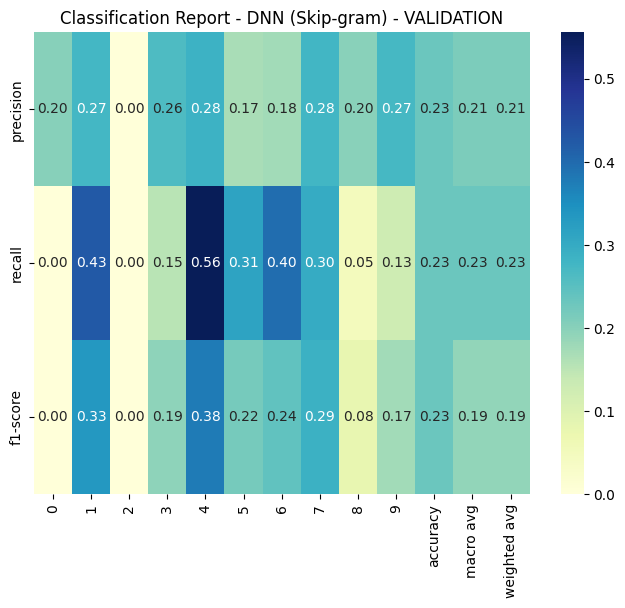

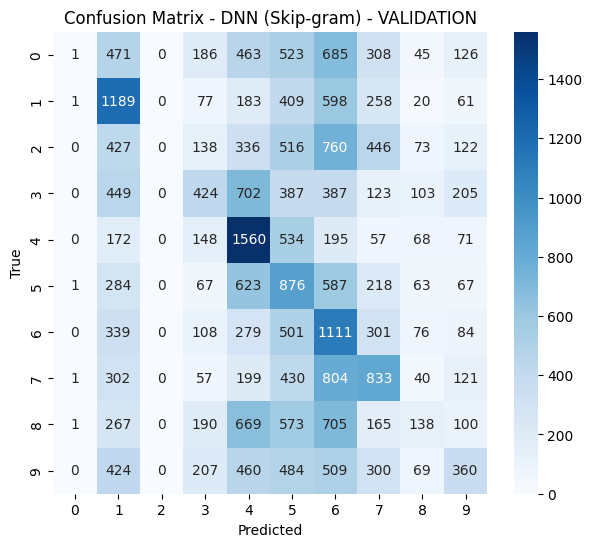

DNN (Skip-gram) - TEST | Accuracy: 0.2342 | F1 (Weighted): 0.1925


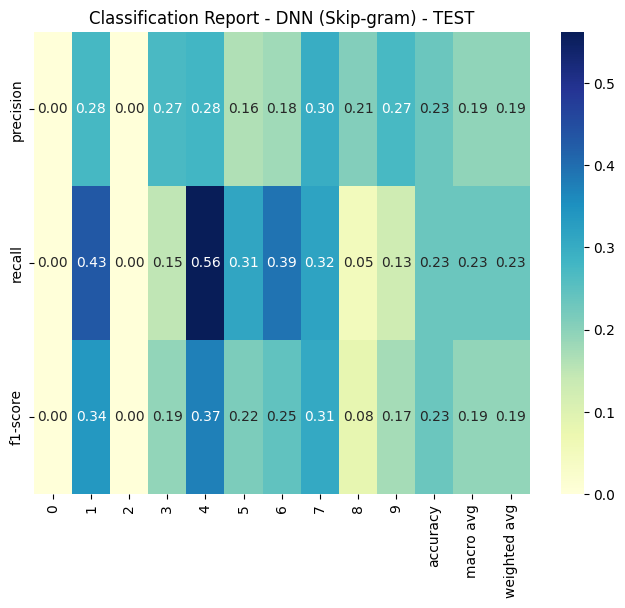

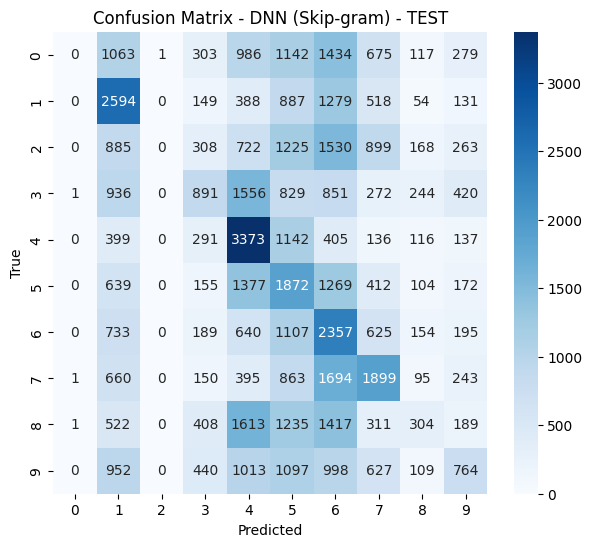

(0.23423723728728812, 0.1925086528451824)

In [34]:
# For Skip-gram (Word2Vec averaged embeddings)
X_train_in = X_train_w2v   # already dense numpy arrays
X_val_in   = X_val_w2v
X_test_in  = X_test_w2v

num_classes = len(label_mapping)

# Build and train DNN
dnn_model = build_dnn(X_train_in.shape[1], num_classes)
dnn_model.fit(X_train_in, y_train,
              validation_data=(X_val_in, y_val),
              epochs=10, batch_size=32, verbose=2)

# Predictions
y_val_pred = np.argmax(dnn_model.predict(X_val_in, verbose=0), axis=1)
y_test_pred = np.argmax(dnn_model.predict(X_test_in, verbose=0), axis=1)

# Evaluation
evaluate_model(y_val, y_val_pred, model_name="DNN (Skip-gram) - VALIDATION")
evaluate_model(y_test, y_test_pred, model_name="DNN (Skip-gram) - TEST")


Epoch 1/10
7875/7875 - 22s - 3ms/step - accuracy: 0.1698 - loss: 2.2364 - val_accuracy: 0.2203 - val_loss: 2.1719
Epoch 2/10
7875/7875 - 18s - 2ms/step - accuracy: 0.1993 - loss: 2.1913 - val_accuracy: 0.2250 - val_loss: 2.1567
Epoch 3/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2063 - loss: 2.1801 - val_accuracy: 0.2261 - val_loss: 2.1623
Epoch 4/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2093 - loss: 2.1737 - val_accuracy: 0.2323 - val_loss: 2.1554
Epoch 5/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2137 - loss: 2.1673 - val_accuracy: 0.2388 - val_loss: 2.1434
Epoch 6/10
7875/7875 - 17s - 2ms/step - accuracy: 0.2162 - loss: 2.1625 - val_accuracy: 0.2366 - val_loss: 2.1504
Epoch 7/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2183 - loss: 2.1588 - val_accuracy: 0.2382 - val_loss: 2.1399
Epoch 8/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2197 - loss: 2.1545 - val_accuracy: 0.2394 - val_loss: 2.1400
Epoch 9/10
7875/7875 - 18s - 2ms/step - accuracy: 0.2216 - loss: 2.1526 - val_accuracy: 

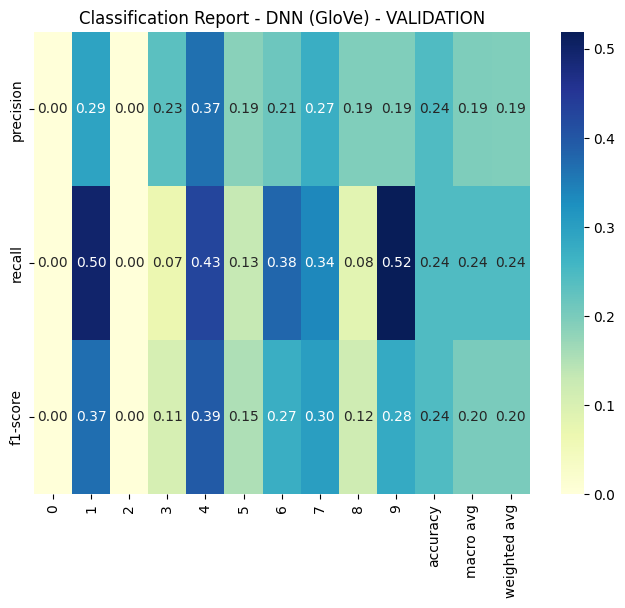

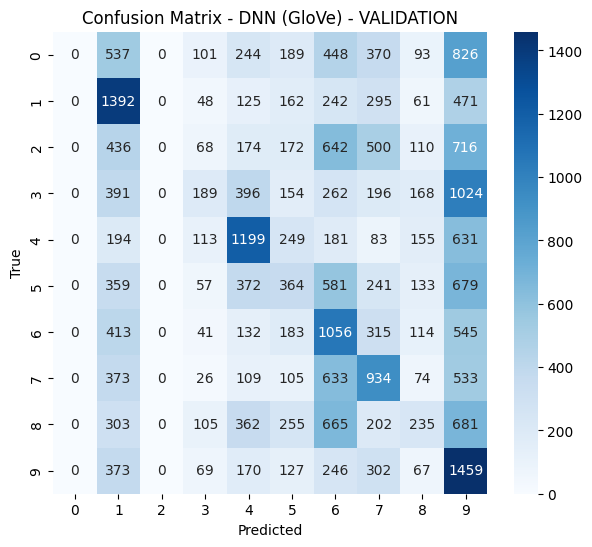

DNN (GloVe) - TEST | Accuracy: 0.2462 | F1 (Weighted): 0.2015


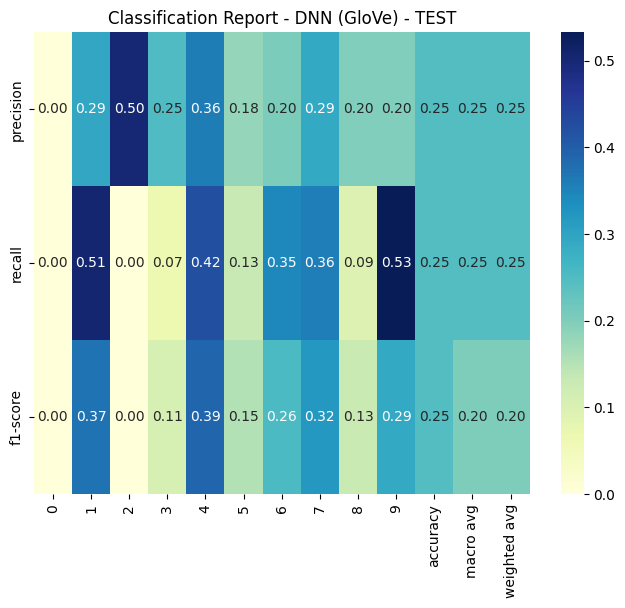

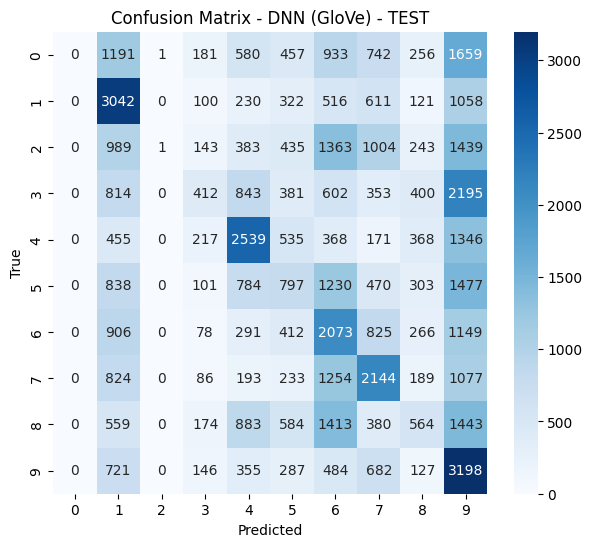

(0.2461707695128252, 0.2015029276906199)

In [37]:
# For GloVe (averaged embeddings)
X_train_in = X_train_glove
X_val_in   = X_val_glove
X_test_in  = X_test_glove

num_classes = len(label_mapping)

# Build and train DNN
dnn_model = build_dnn(X_train_in.shape[1], num_classes)
dnn_model.fit(X_train_in, y_train,
              validation_data=(X_val_in, y_val),
              epochs=10, batch_size=32, verbose=2)

# Predictions
y_val_pred = np.argmax(dnn_model.predict(X_val_in, verbose=0), axis=1)
y_test_pred = np.argmax(dnn_model.predict(X_test_in, verbose=0), axis=1)

# Evaluation
evaluate_model(y_val, y_val_pred, model_name="DNN (GloVe) - VALIDATION")
evaluate_model(y_test, y_test_pred, model_name="DNN (GloVe) - TEST")


In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Use cleaned text from your pre-processing
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(list(X_train) + list(X_val) + list(X_test))

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')


In [23]:
# For GloVe
embedding_dim = len(next(iter(embeddings.values())))  # auto-detect
embedding_matrix_glove = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in embeddings:
        embedding_matrix_glove[i] = embeddings[word]

# For Skip-gram (Word2Vec)
embedding_dim_w2v = w2v_model.vector_size
embedding_matrix_w2v = np.zeros((len(tokenizer.word_index) + 1, embedding_dim_w2v))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix_w2v[i] = w2v_model.wv[word]


**RNN models**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Bidirectional, Dense, Dropout

# ----- Model builders -----
def build_rnn_model(cell="rnn", bidirectional=False, embedding_matrix=None, 
                    maxlen=100, embedding_dim=100, num_classes=3, trainable=False):
    model = Sequential()
    # Embedding layer (use GloVe or Skip-gram matrix)
    model.add(Embedding(input_dim=embedding_matrix.shape[0],
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=maxlen,
                        trainable=trainable))
    
    # Recurrent layer
    if cell == "rnn":
        rnn_layer = SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2)
    elif cell == "gru":
        rnn_layer = GRU(128, dropout=0.2, recurrent_dropout=0.2)
    elif cell == "lstm":
        rnn_layer = LSTM(128, dropout=0.2, recurrent_dropout=0.2)
    else:
        raise ValueError("Unknown cell type")

    if bidirectional:
        model.add(Bidirectional(rnn_layer))
    else:
        model.add(rnn_layer)
    
    # Dense layers
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [25]:
# Input sequences (padded already)
X_train_in, X_val_in, X_test_in = X_train_pad, X_val_pad, X_test_pad
num_classes = len(label_mapping)

# Model list
models_to_run = [
    ("SimpleRNN", {"cell": "rnn", "bidirectional": False}),
    ("GRU", {"cell": "gru", "bidirectional": False}),
    ("LSTM", {"cell": "lstm", "bidirectional": False}),
    ("BiSimpleRNN", {"cell": "rnn", "bidirectional": True}),
    ("BiGRU", {"cell": "gru", "bidirectional": True}),
    ("BiLSTM", {"cell": "lstm", "bidirectional": True}),
]

results = []

SimpleRNN with GloVe


=== SimpleRNN with GloVe ===
Epoch 1/5
985/985 - 20s - 20ms/step - accuracy: 0.1089 - loss: 2.3193 - val_accuracy: 0.1795 - val_loss: 2.2004
Epoch 2/5
985/985 - 12s - 12ms/step - accuracy: 0.1283 - loss: 2.2703 - val_accuracy: 0.1284 - val_loss: 2.2721
Epoch 3/5
985/985 - 12s - 12ms/step - accuracy: 0.1193 - loss: 2.2868 - val_accuracy: 0.1038 - val_loss: 2.2832
Epoch 4/5
985/985 - 12s - 12ms/step - accuracy: 0.1158 - loss: 2.2904 - val_accuracy: 0.1120 - val_loss: 2.2905
Epoch 5/5
985/985 - 12s - 12ms/step - accuracy: 0.1158 - loss: 2.2863 - val_accuracy: 0.1246 - val_loss: 2.2713
SimpleRNN (GloVe) VAL | Accuracy: 0.1246 | F1 (Weighted): 0.0724


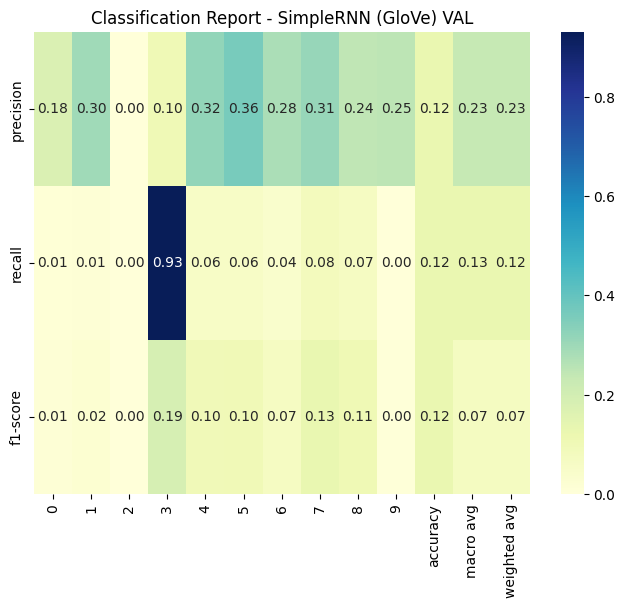

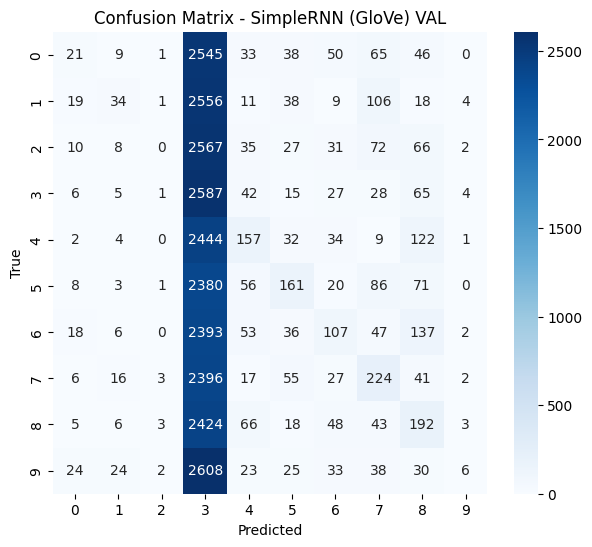

SimpleRNN (GloVe) TEST | Accuracy: 0.1244 | F1 (Weighted): 0.0703


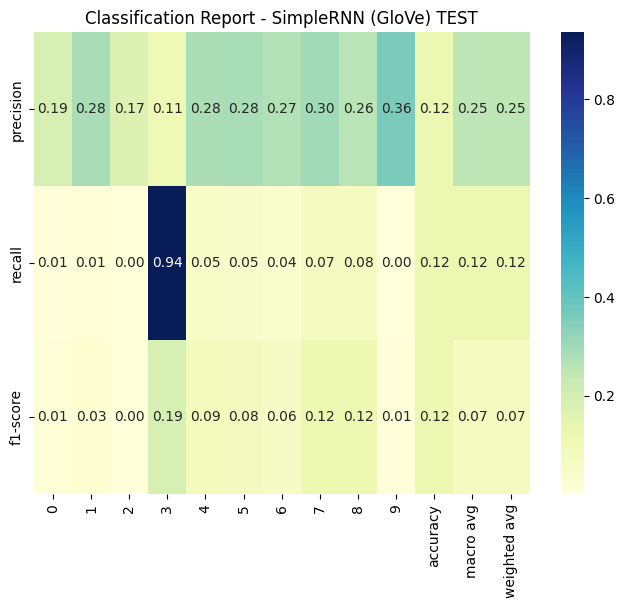

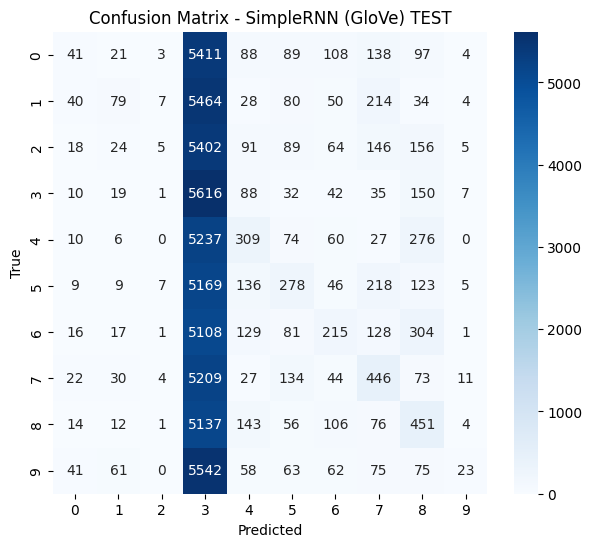

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,158,244 (332.48 MB)

 Trainable params: 47,114 (184.04 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 94,230 (368.09 KB)

None


In [36]:
print("\n=== SimpleRNN with GloVe ===")

model = build_rnn_model(cell="rnn", bidirectional=False,
                        embedding_matrix=embedding_matrix_glove,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_glove.shape[1],
                        num_classes=num_classes,
                        trainable=False)


model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

# Validation
y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="SimpleRNN (GloVe) VAL")

# Test
y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="SimpleRNN (GloVe) TEST")

print(model.summary())

GRU with GloVe


=== GRU with GloVe ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 213s - 216ms/step - accuracy: 0.3823 - loss: 1.7479 - val_accuracy: 0.6228 - val_loss: 1.1693
Epoch 2/5
985/985 - 203s - 206ms/step - accuracy: 0.6149 - loss: 1.2031 - val_accuracy: 0.6649 - val_loss: 1.0317
Epoch 3/5
985/985 - 203s - 206ms/step - accuracy: 0.6469 - loss: 1.1122 - val_accuracy: 0.6791 - val_loss: 0.9905
Epoch 4/5
985/985 - 213s - 216ms/step - accuracy: 0.6601 - loss: 1.0698 - val_accuracy: 0.6868 - val_loss: 0.9647
Epoch 5/5
985/985 - 206s - 209ms/step - accuracy: 0.6686 - loss: 1.0425 - val_accuracy: 0.6919 - val_loss: 0.9477
GRU (GloVe) VAL | Accuracy: 0.6919 | F1 (Weighted): 0.6845


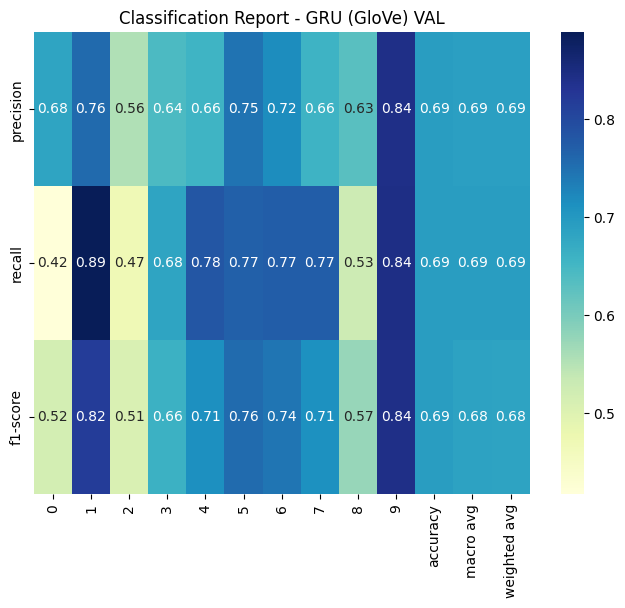

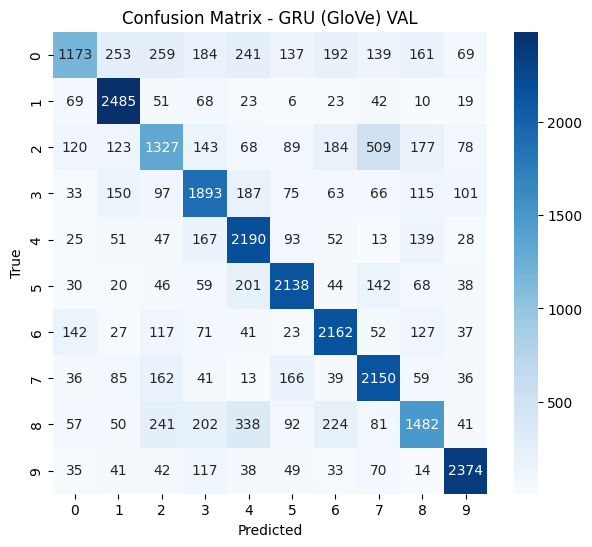

GRU (GloVe) TEST | Accuracy: 0.6912 | F1 (Weighted): 0.6841


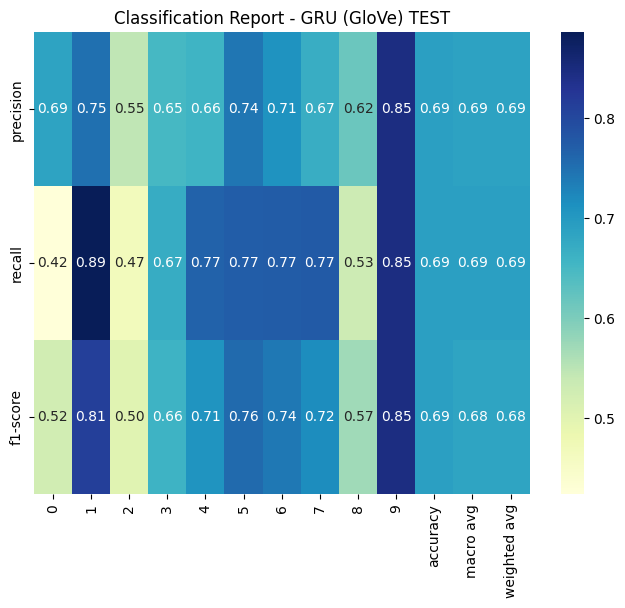

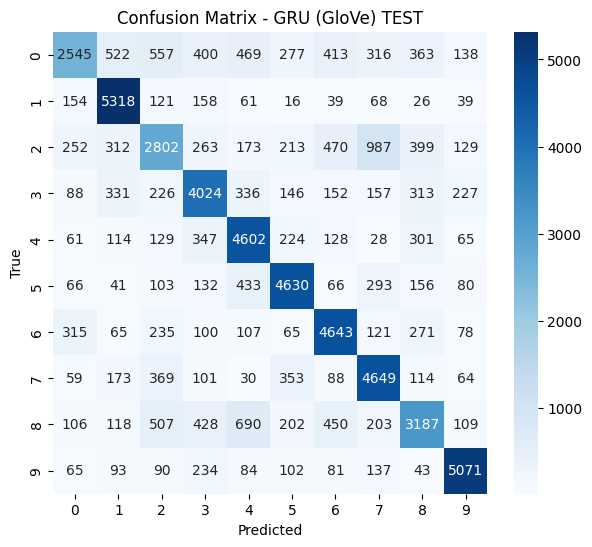

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,335,268 (333.16 MB)

 Trainable params: 106,122 (414.54 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 212,246 (829.09 KB)

None


In [37]:
print("\n=== GRU with GloVe ===")

model = build_rnn_model(cell="gru", bidirectional=False,
                        embedding_matrix=embedding_matrix_glove,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_glove.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="GRU (GloVe) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="GRU (GloVe) TEST")
print(model.summary())

 LSTM with GloVe


=== LSTM with GloVe ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 243s - 247ms/step - accuracy: 0.2173 - loss: 2.1194 - val_accuracy: 0.3010 - val_loss: 1.9605
Epoch 2/5
985/985 - 238s - 241ms/step - accuracy: 0.3374 - loss: 1.8633 - val_accuracy: 0.5338 - val_loss: 1.4109
Epoch 3/5
985/985 - 238s - 242ms/step - accuracy: 0.5368 - loss: 1.4233 - val_accuracy: 0.6356 - val_loss: 1.1461
Epoch 4/5
985/985 - 236s - 240ms/step - accuracy: 0.6111 - loss: 1.2396 - val_accuracy: 0.6550 - val_loss: 1.0719
Epoch 5/5
985/985 - 237s - 240ms/step - accuracy: 0.6325 - loss: 1.1686 - val_accuracy: 0.6710 - val_loss: 1.0257
LSTM (GloVe) VAL | Accuracy: 0.6710 | F1 (Weighted): 0.6627


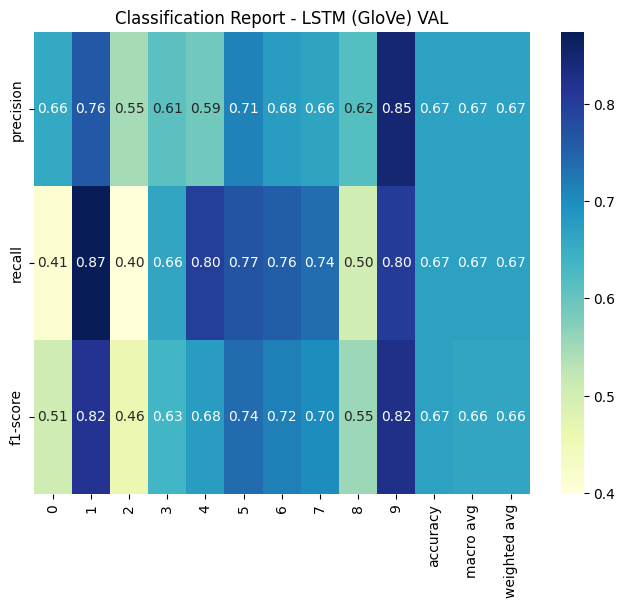

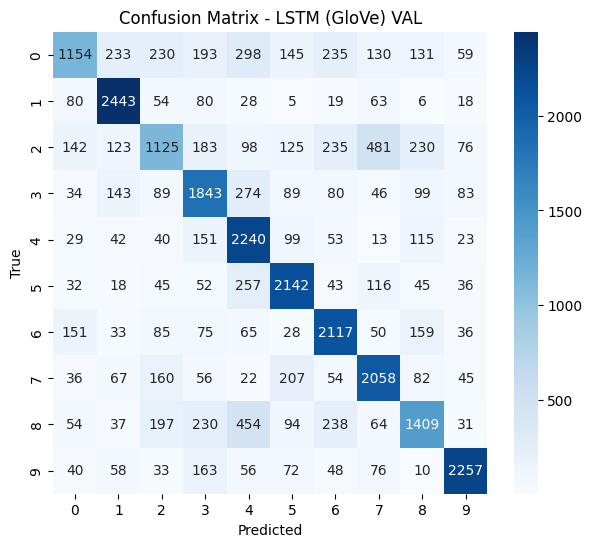

LSTM (GloVe) TEST | Accuracy: 0.6680 | F1 (Weighted): 0.6594


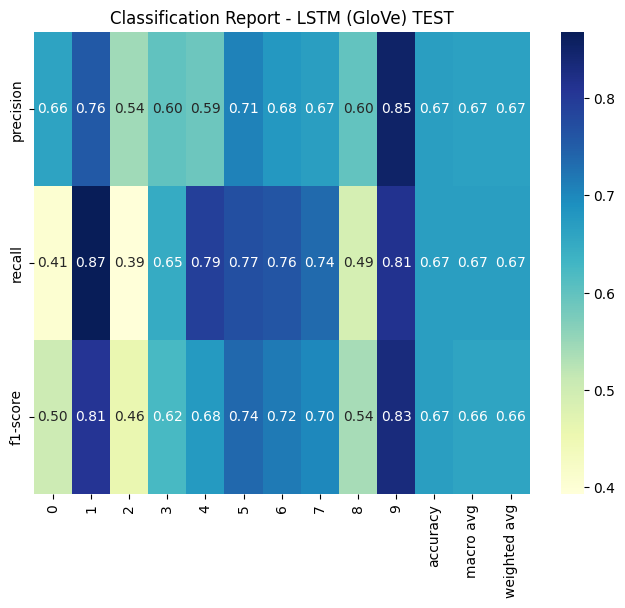

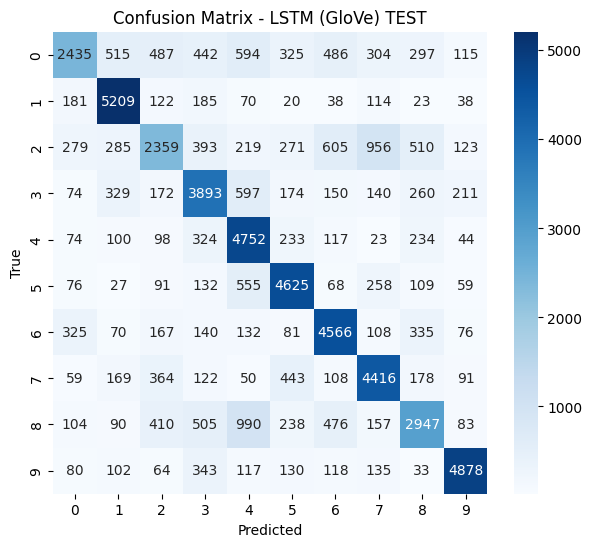

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,422,052 (333.49 MB)

 Trainable params: 135,050 (527.54 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 270,102 (1.03 MB)

None


In [38]:
print("\n=== LSTM with GloVe ===")

model = build_rnn_model(cell="lstm", bidirectional=False,
                        embedding_matrix=embedding_matrix_glove,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_glove.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="LSTM (GloVe) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="LSTM (GloVe) TEST")
print(model.summary())

Bidirectional SimpleRNN with GloVe


=== Bidirectional SimpleRNN with GloVe ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 36s - 36ms/step - accuracy: 0.4223 - loss: 1.7092 - val_accuracy: 0.4831 - val_loss: 1.5526
Epoch 2/5
985/985 - 21s - 21ms/step - accuracy: 0.4722 - loss: 1.6012 - val_accuracy: 0.5394 - val_loss: 1.4194
Epoch 3/5
985/985 - 21s - 22ms/step - accuracy: 0.4679 - loss: 1.6138 - val_accuracy: 0.5399 - val_loss: 1.4207
Epoch 4/5
985/985 - 21s - 22ms/step - accuracy: 0.4993 - loss: 1.5406 - val_accuracy: 0.5691 - val_loss: 1.3478
Epoch 5/5
985/985 - 21s - 22ms/step - accuracy: 0.5008 - loss: 1.5394 - val_accuracy: 0.5709 - val_loss: 1.3327
BiSimpleRNN (GloVe) VAL | Accuracy: 0.5709 | F1 (Weighted): 0.5600


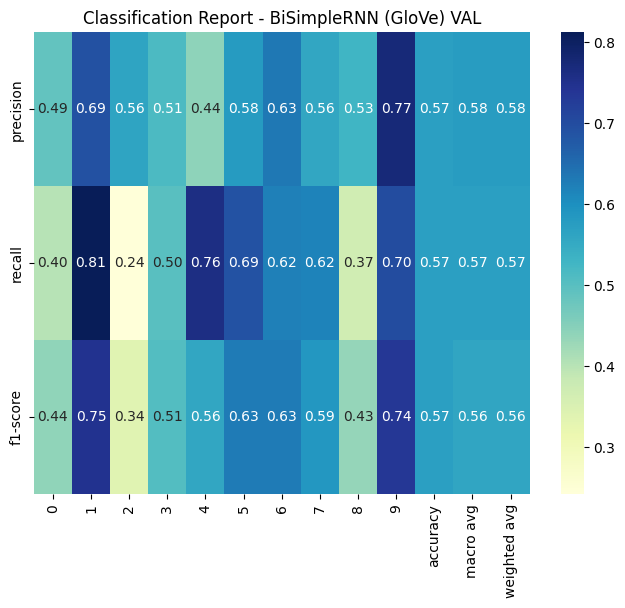

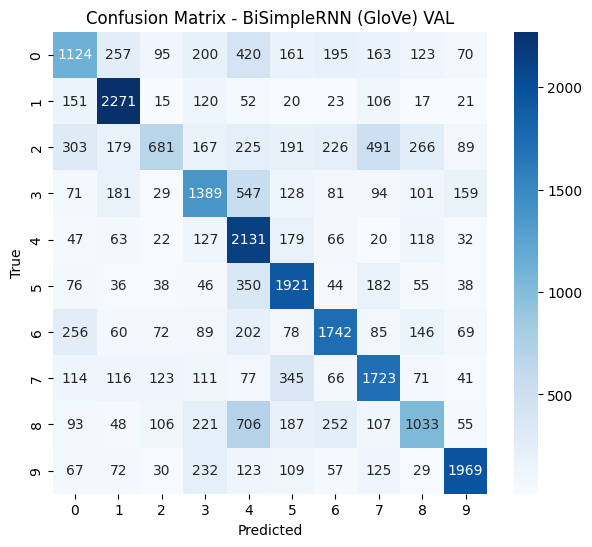

BiSimpleRNN (GloVe) TEST | Accuracy: 0.5711 | F1 (Weighted): 0.5603


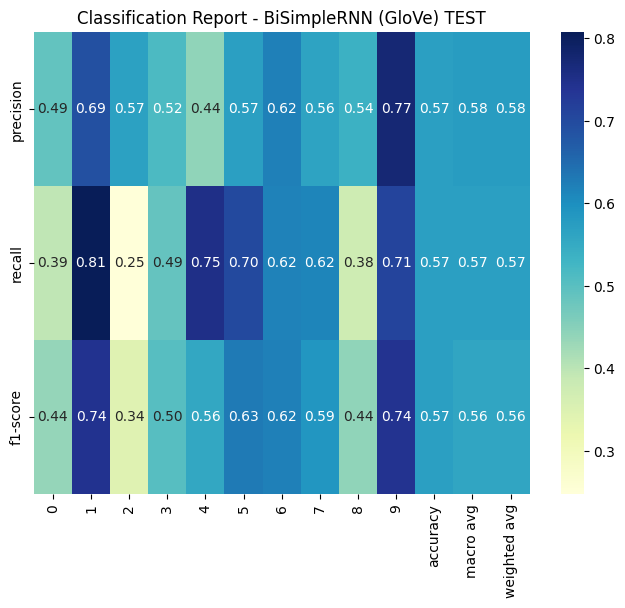

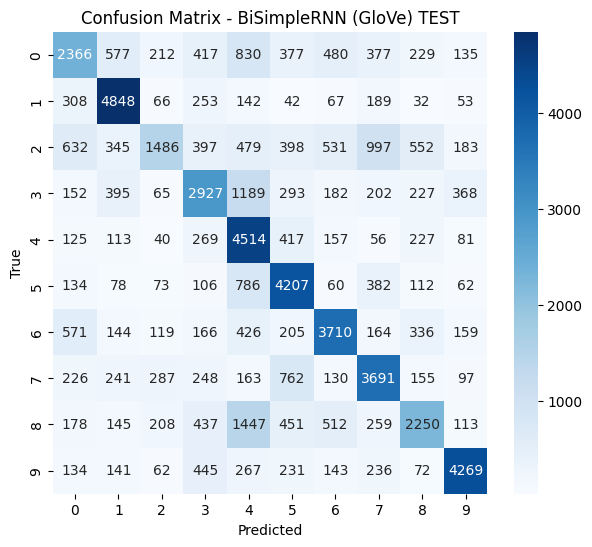

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │        58,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,295,332 (333.01 MB)

 Trainable params: 92,810 (362.54 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 185,622 (725.09 KB)

None


In [39]:
print("\n=== Bidirectional SimpleRNN with GloVe ===")

model = build_rnn_model(cell="rnn", bidirectional=True,
                        embedding_matrix=embedding_matrix_glove,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_glove.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="BiSimpleRNN (GloVe) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="BiSimpleRNN (GloVe) TEST")
print(model.summary())

Bidirectional GRU with GloVe


=== Bidirectional GRU with GloVe ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 331s - 336ms/step - accuracy: 0.6090 - loss: 1.2098 - val_accuracy: 0.6796 - val_loss: 0.9904
Epoch 2/5
985/985 - 346s - 352ms/step - accuracy: 0.6632 - loss: 1.0553 - val_accuracy: 0.6933 - val_loss: 0.9512
Epoch 3/5
985/985 - 364s - 370ms/step - accuracy: 0.6728 - loss: 1.0190 - val_accuracy: 0.6985 - val_loss: 0.9308
Epoch 4/5
985/985 - 370s - 376ms/step - accuracy: 0.6803 - loss: 0.9949 - val_accuracy: 0.7034 - val_loss: 0.9179
Epoch 5/5
985/985 - 370s - 376ms/step - accuracy: 0.6855 - loss: 0.9790 - val_accuracy: 0.7036 - val_loss: 0.9135
BiGRU (GloVe) VAL | Accuracy: 0.7036 | F1 (Weighted): 0.6972


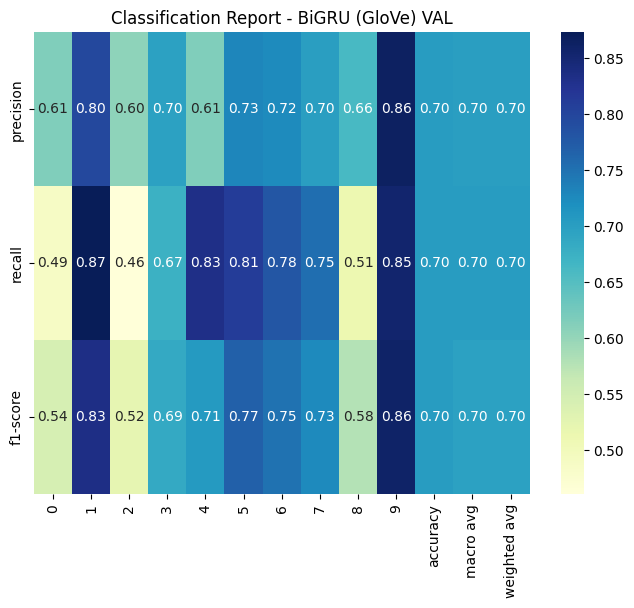

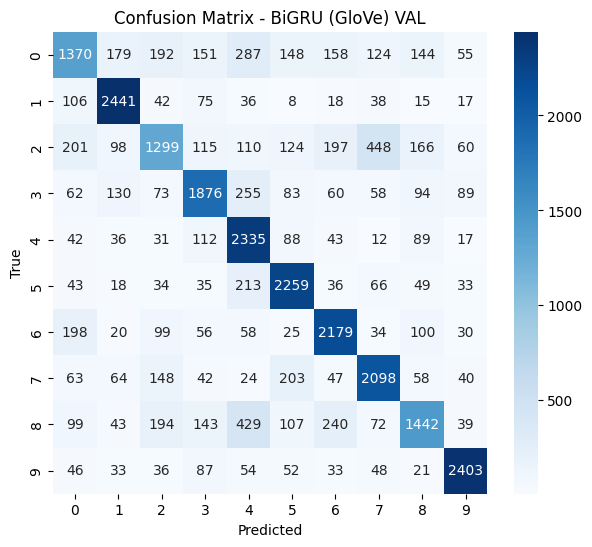

BiGRU (GloVe) TEST | Accuracy: 0.7014 | F1 (Weighted): 0.6946


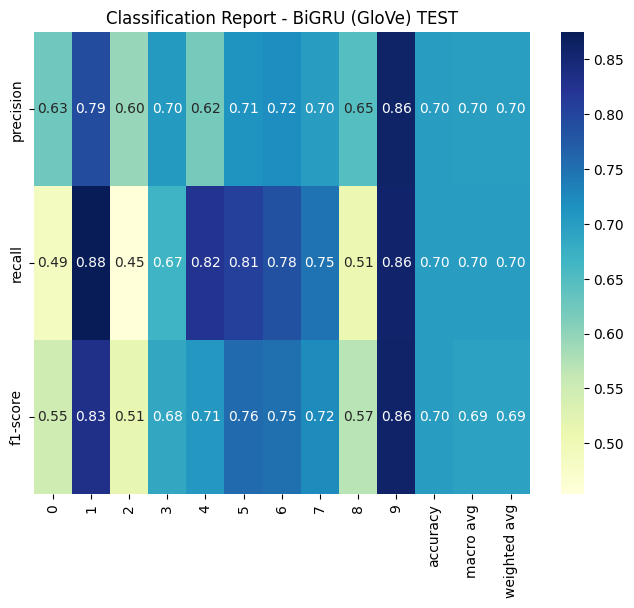

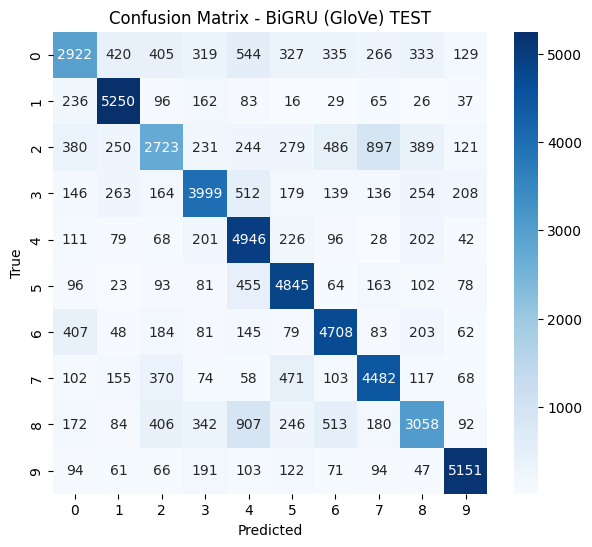

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       176,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,649,380 (334.36 MB)

 Trainable params: 210,826 (823.54 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 421,654 (1.61 MB)

None


In [40]:
print("\n=== Bidirectional GRU with GloVe ===")

model = build_rnn_model(cell="gru", bidirectional=True,
                        embedding_matrix=embedding_matrix_glove,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_glove.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="BiGRU (GloVe) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="BiGRU (GloVe) TEST")
print(model.summary())

Bidirectional LSTM with GloVe


=== Bidirectional LSTM with GloVe ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 405s - 411ms/step - accuracy: 0.6125 - loss: 1.2047 - val_accuracy: 0.6788 - val_loss: 0.9992
Epoch 2/5
985/985 - 392s - 398ms/step - accuracy: 0.6620 - loss: 1.0578 - val_accuracy: 0.6900 - val_loss: 0.9573
Epoch 3/5
985/985 - 390s - 396ms/step - accuracy: 0.6746 - loss: 1.0167 - val_accuracy: 0.6946 - val_loss: 0.9378
Epoch 4/5
985/985 - 389s - 395ms/step - accuracy: 0.6833 - loss: 0.9894 - val_accuracy: 0.7017 - val_loss: 0.9187
Epoch 5/5
985/985 - 386s - 392ms/step - accuracy: 0.6878 - loss: 0.9732 - val_accuracy: 0.7035 - val_loss: 0.9096
BiLSTM (GloVe) VAL | Accuracy: 0.7035 | F1 (Weighted): 0.6961


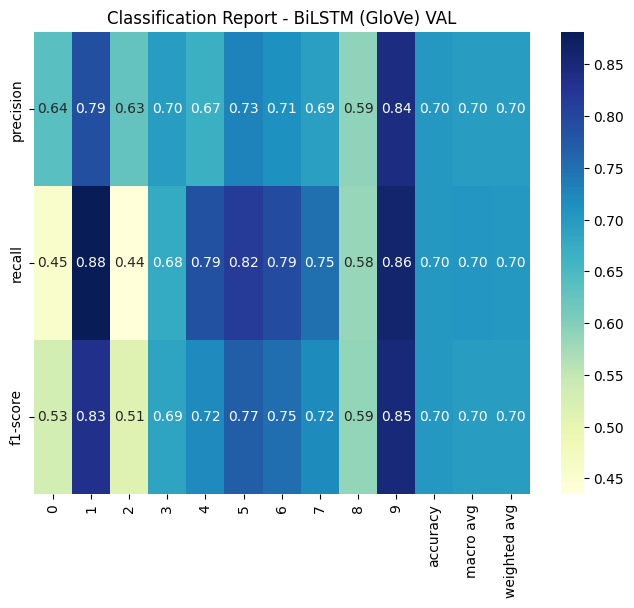

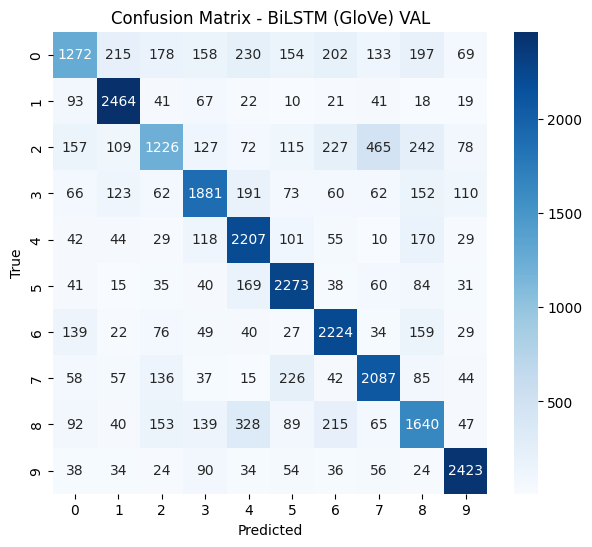

BiLSTM (GloVe) TEST | Accuracy: 0.7021 | F1 (Weighted): 0.6948


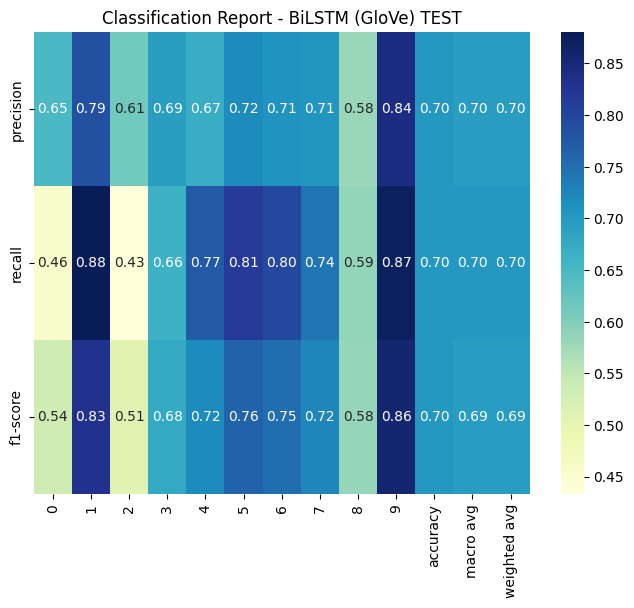

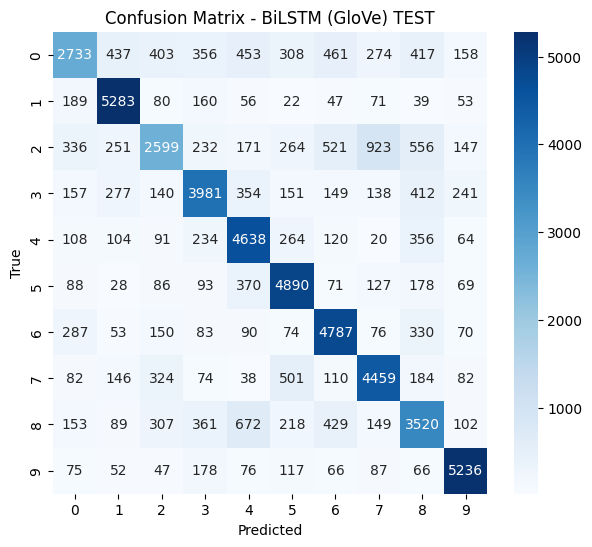

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,822,948 (335.02 MB)

 Trainable params: 268,682 (1.02 MB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 537,366 (2.05 MB)

None


In [41]:
print("\n=== Bidirectional LSTM with GloVe ===")

model = build_rnn_model(cell="lstm", bidirectional=True,
                        embedding_matrix=embedding_matrix_glove,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_glove.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="BiLSTM (GloVe) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="BiLSTM (GloVe) TEST")
print(model.summary())

SimpleRNN with Skip-gram


=== SimpleRNN with Skip-gram ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 20s - 21ms/step - accuracy: 0.1091 - loss: 2.3064 - val_accuracy: 0.1212 - val_loss: 2.2812
Epoch 2/5
985/985 - 12s - 12ms/step - accuracy: 0.1177 - loss: 2.2853 - val_accuracy: 0.1275 - val_loss: 2.2657
Epoch 3/5
985/985 - 12s - 12ms/step - accuracy: 0.1192 - loss: 2.2899 - val_accuracy: 0.1326 - val_loss: 2.2626
Epoch 4/5
985/985 - 12s - 12ms/step - accuracy: 0.1247 - loss: 2.2765 - val_accuracy: 0.1267 - val_loss: 2.2747
Epoch 5/5
985/985 - 12s - 12ms/step - accuracy: 0.1259 - loss: 2.2703 - val_accuracy: 0.1232 - val_loss: 2.2751
SimpleRNN (Skip-gram) VAL | Accuracy: 0.1232 | F1 (Weighted): 0.0671


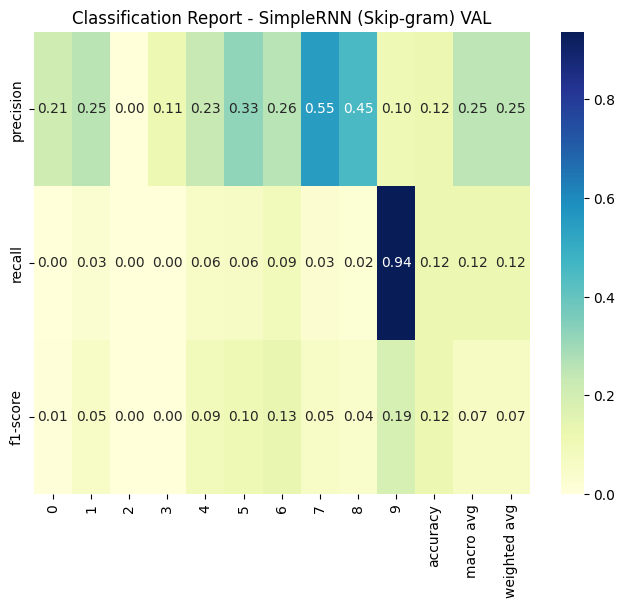

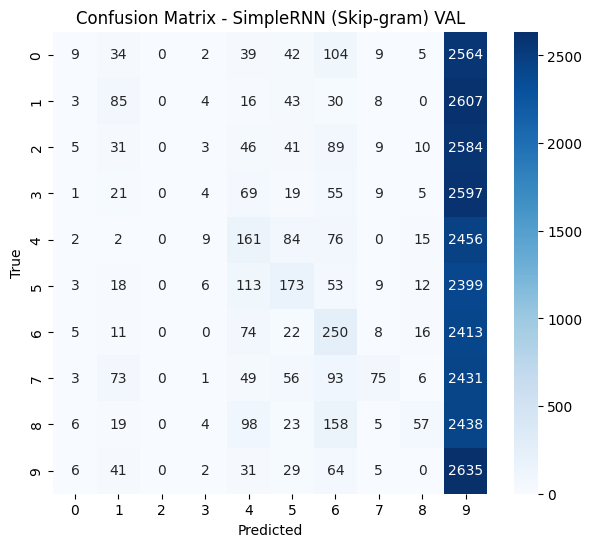

SimpleRNN (Skip-gram) TEST | Accuracy: 0.1224 | F1 (Weighted): 0.0660


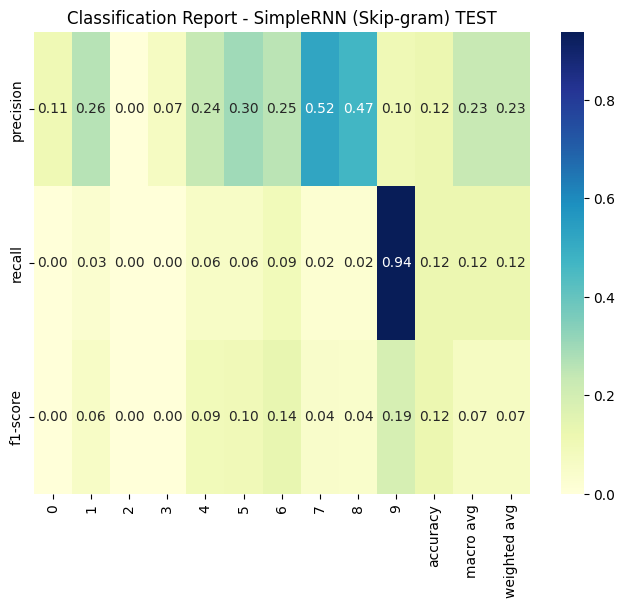

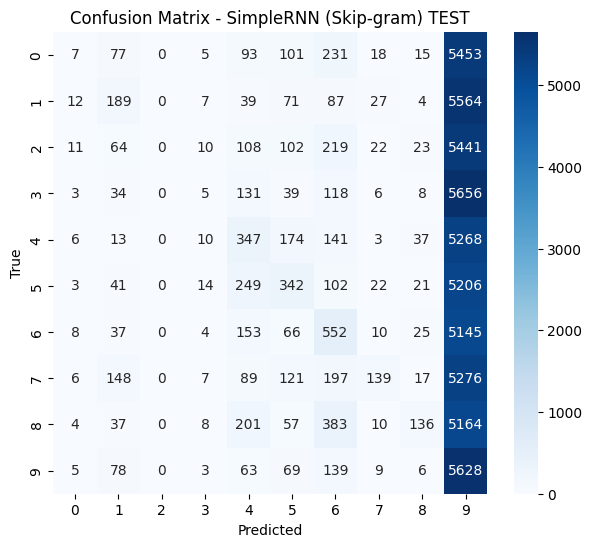

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 128)            │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,158,244 (332.48 MB)

 Trainable params: 47,114 (184.04 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 94,230 (368.09 KB)

None


In [42]:
print("\n=== SimpleRNN with Skip-gram ===")

model = build_rnn_model(cell="rnn", bidirectional=False,
                        embedding_matrix=embedding_matrix_w2v,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_w2v.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

# Validation
y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="SimpleRNN (Skip-gram) VAL")

# Test
y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="SimpleRNN (Skip-gram) TEST")
print(model.summary())

GRU with Skip-gram


=== GRU with Skip-gram ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 232s - 236ms/step - accuracy: 0.5012 - loss: 1.4516 - val_accuracy: 0.6840 - val_loss: 0.9783
Epoch 2/5
985/985 - 220s - 224ms/step - accuracy: 0.6693 - loss: 1.0491 - val_accuracy: 0.6985 - val_loss: 0.9339
Epoch 3/5
985/985 - 222s - 226ms/step - accuracy: 0.6796 - loss: 1.0098 - val_accuracy: 0.7037 - val_loss: 0.9177
Epoch 4/5
985/985 - 222s - 226ms/step - accuracy: 0.6858 - loss: 0.9895 - val_accuracy: 0.7059 - val_loss: 0.9047
Epoch 5/5
985/985 - 225s - 228ms/step - accuracy: 0.6900 - loss: 0.9730 - val_accuracy: 0.7096 - val_loss: 0.8950
GRU (Skip-gram) VAL | Accuracy: 0.7096 | F1 (Weighted): 0.7036


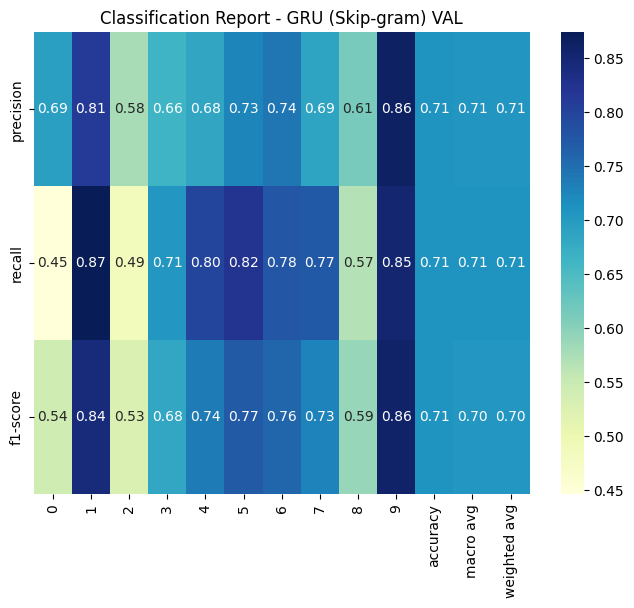

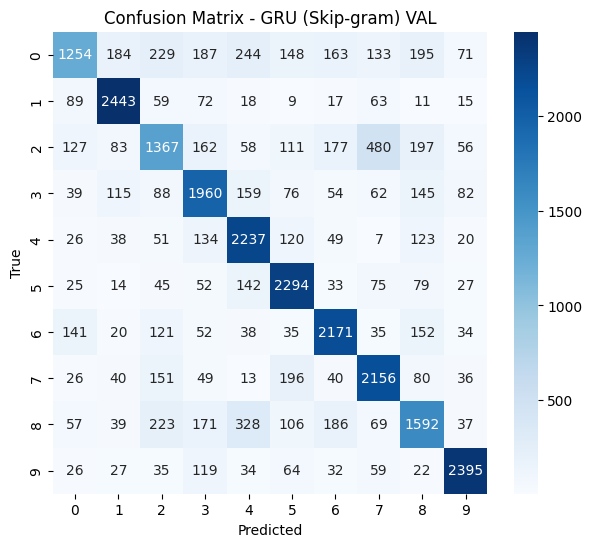

GRU (Skip-gram) TEST | Accuracy: 0.7080 | F1 (Weighted): 0.7022


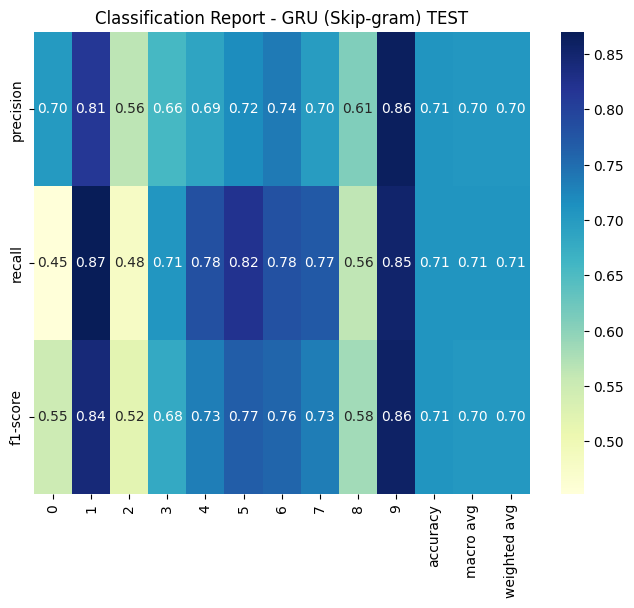

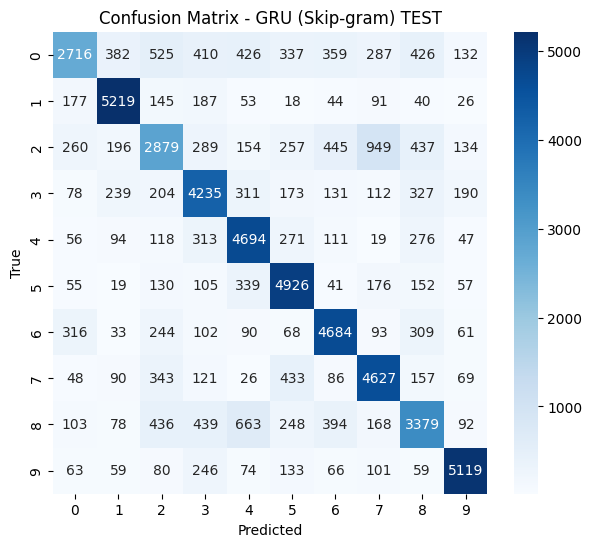

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,335,268 (333.16 MB)

 Trainable params: 106,122 (414.54 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 212,246 (829.09 KB)

None


In [43]:
print("\n=== GRU with Skip-gram ===")

model = build_rnn_model(cell="gru", bidirectional=False,
                        embedding_matrix=embedding_matrix_w2v,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_w2v.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="GRU (Skip-gram) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="GRU (Skip-gram) TEST")
print(model.summary())

LSTM with Skip-gram


=== LSTM with Skip-gram ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 276s - 280ms/step - accuracy: 0.1636 - loss: 2.2036 - val_accuracy: 0.1886 - val_loss: 2.1553
Epoch 2/5
985/985 - 273s - 278ms/step - accuracy: 0.1935 - loss: 2.1415 - val_accuracy: 0.3834 - val_loss: 1.7416
Epoch 3/5
985/985 - 268s - 272ms/step - accuracy: 0.5196 - loss: 1.4349 - val_accuracy: 0.6400 - val_loss: 1.1045
Epoch 4/5
985/985 - 266s - 270ms/step - accuracy: 0.6201 - loss: 1.1991 - val_accuracy: 0.6695 - val_loss: 1.0351
Epoch 5/5
985/985 - 268s - 272ms/step - accuracy: 0.6424 - loss: 1.1400 - val_accuracy: 0.6784 - val_loss: 0.9995
LSTM (Skip-gram) VAL | Accuracy: 0.6784 | F1 (Weighted): 0.6703


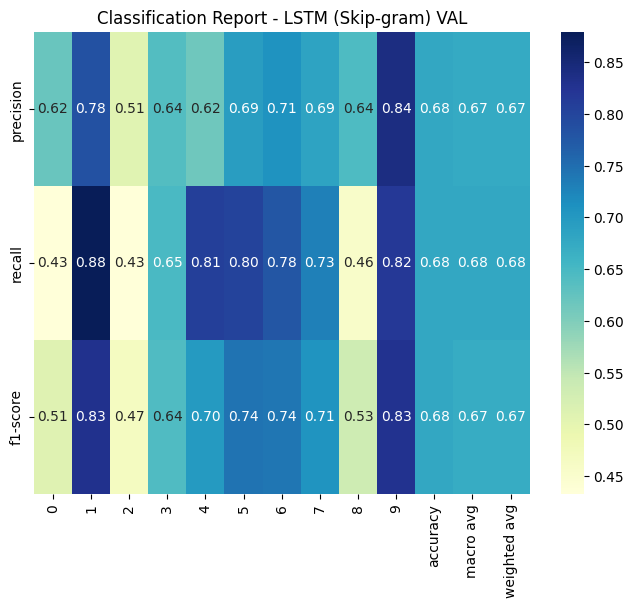

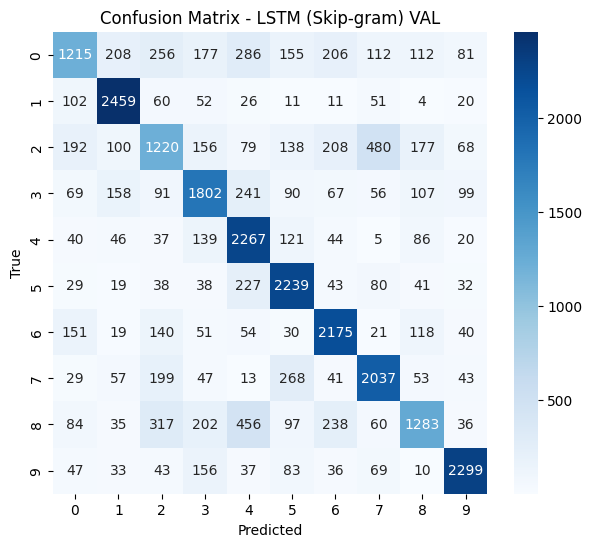

LSTM (Skip-gram) TEST | Accuracy: 0.6773 | F1 (Weighted): 0.6694


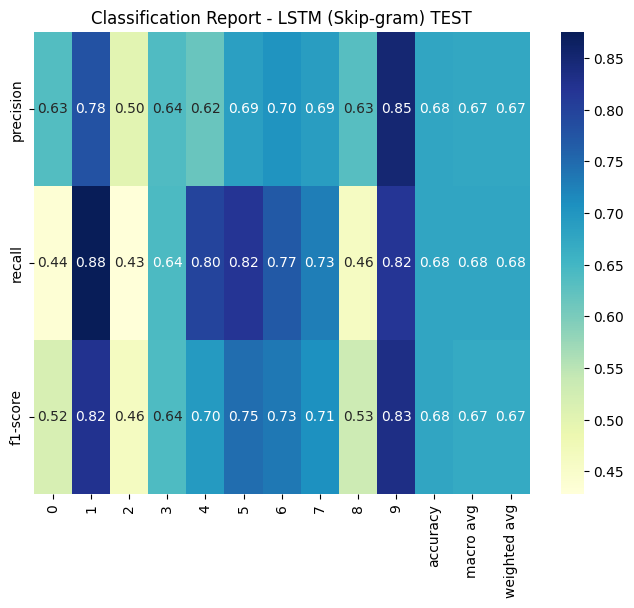

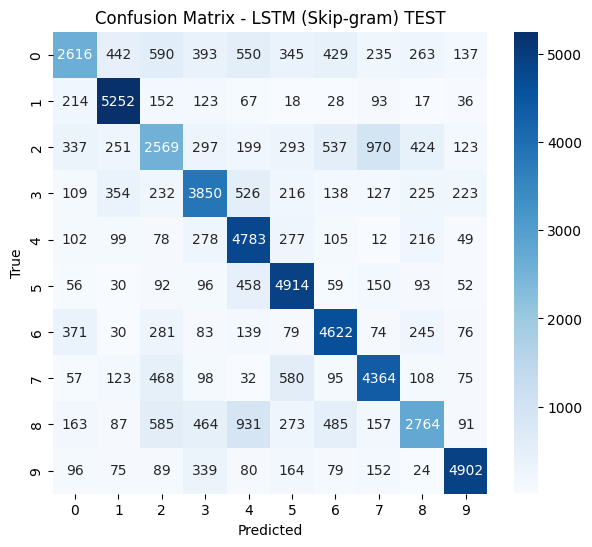

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,422,052 (333.49 MB)

 Trainable params: 135,050 (527.54 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 270,102 (1.03 MB)

None


In [44]:
print("\n=== LSTM with Skip-gram ===")

model = build_rnn_model(cell="lstm", bidirectional=False,
                        embedding_matrix=embedding_matrix_w2v,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_w2v.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="LSTM (Skip-gram) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="LSTM (Skip-gram) TEST")
print(model.summary())

Bidirectional SimpleRNN with Skip-gram


=== Bidirectional SimpleRNN with Skip-gram ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 35s - 36ms/step - accuracy: 0.4622 - loss: 1.6068 - val_accuracy: 0.5782 - val_loss: 1.2977
Epoch 2/5
985/985 - 22s - 23ms/step - accuracy: 0.5124 - loss: 1.4938 - val_accuracy: 0.6016 - val_loss: 1.2473
Epoch 3/5
985/985 - 22s - 23ms/step - accuracy: 0.5351 - loss: 1.4395 - val_accuracy: 0.6105 - val_loss: 1.2156
Epoch 4/5
985/985 - 22s - 23ms/step - accuracy: 0.5343 - loss: 1.4436 - val_accuracy: 0.6085 - val_loss: 1.2313
Epoch 5/5
985/985 - 22s - 23ms/step - accuracy: 0.5513 - loss: 1.4025 - val_accuracy: 0.5998 - val_loss: 1.2526
BiSimpleRNN (Skip-gram) VAL | Accuracy: 0.5998 | F1 (Weighted): 0.5947


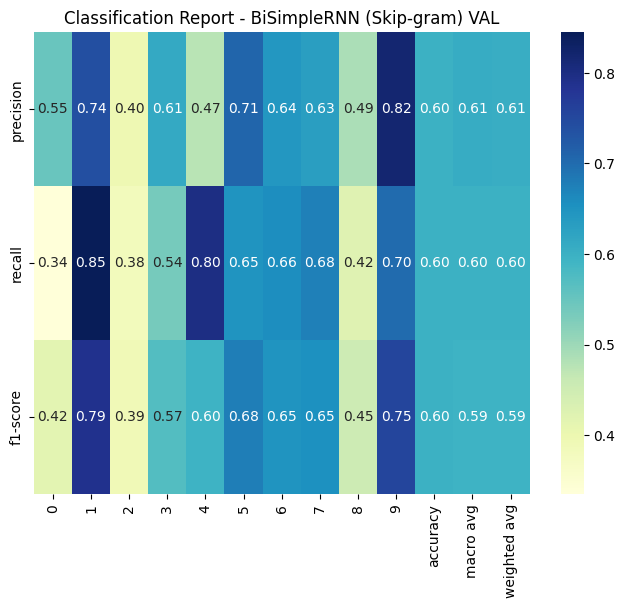

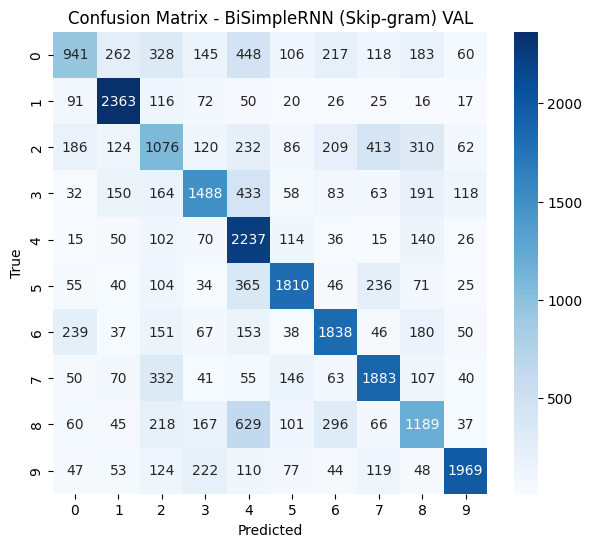

BiSimpleRNN (Skip-gram) TEST | Accuracy: 0.6001 | F1 (Weighted): 0.5945


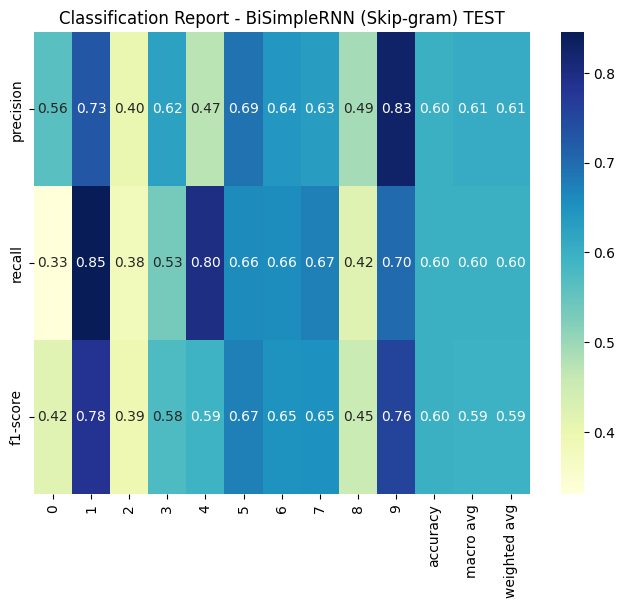

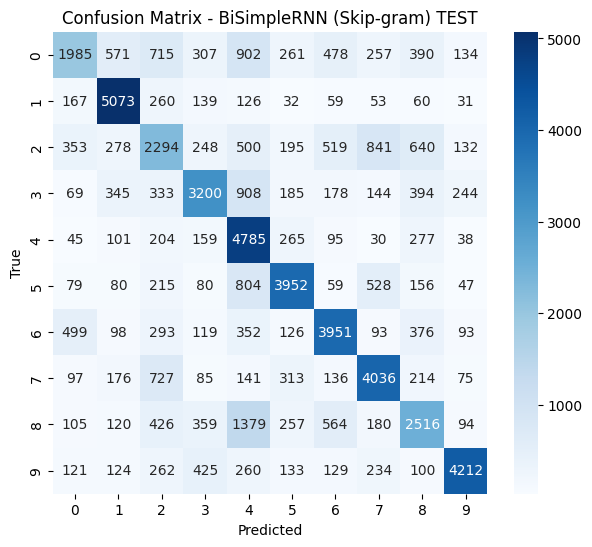

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 256)            │        58,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,295,332 (333.01 MB)

 Trainable params: 92,810 (362.54 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 185,622 (725.09 KB)

None


In [45]:
print("\n=== Bidirectional SimpleRNN with Skip-gram ===")

model = build_rnn_model(cell="rnn", bidirectional=True,
                        embedding_matrix=embedding_matrix_w2v,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_w2v.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="BiSimpleRNN (Skip-gram) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="BiSimpleRNN (Skip-gram) TEST")
print(model.summary())

Bidirectional GRU with Skip-gram


=== Bidirectional GRU with Skip-gram ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1757358290.193898      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1757358290.194567      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/5
985/985 - 354s - 359ms/step - accuracy: 0.6288 - loss: 1.1528 - val_accuracy: 0.6938 - val_loss: 0.9452
Epoch 2/5
985/985 - 340s - 345ms/step - accuracy: 0.6772 - loss: 1.0137 - val_accuracy: 0.7028 - val_loss: 0.9206
Epoch 3/5
985/985 - 343s - 348ms/step - accuracy: 0.6862 - loss: 0.9816 - val_accuracy: 0.7067 - val_loss: 0.9066
Epoch 4/5
985/985 - 337s - 342ms/step - accuracy: 0.6925 - loss: 0.9631 - val_accuracy: 0.7085 - val_loss: 0.8925
Epoch 5/5
985/985 - 336s - 341ms/step - accuracy: 0.6949 - loss: 0.9496 - val_accuracy: 0.7118 - val_loss: 0.8852
BiGRU (Skip-gram) VAL | Accuracy: 0.7118 | F1 (Weighted): 0.7057


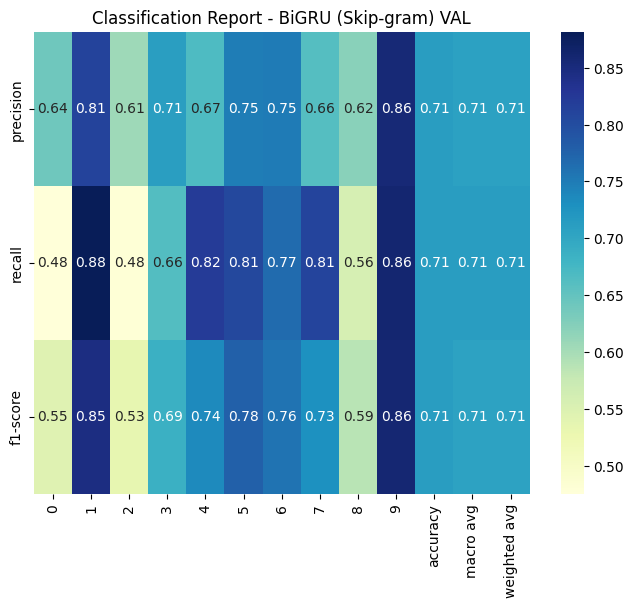

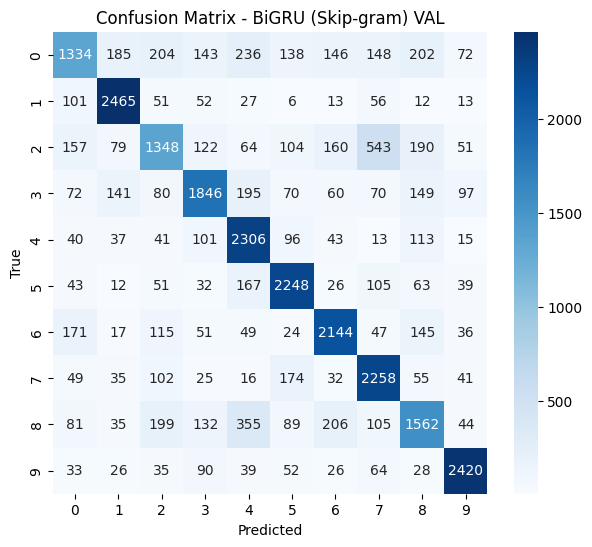

BiGRU (Skip-gram) TEST | Accuracy: 0.7111 | F1 (Weighted): 0.7047


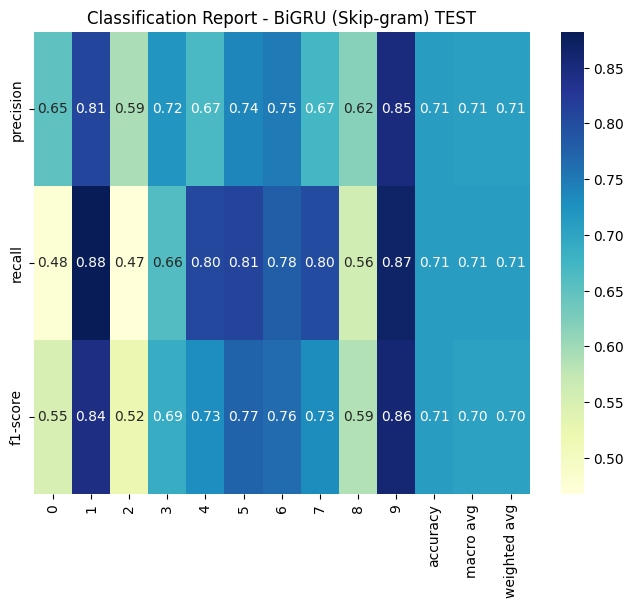

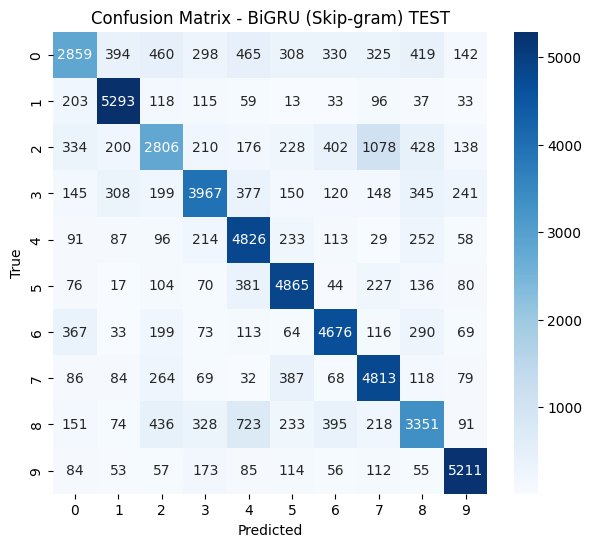

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       176,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,649,380 (334.36 MB)

 Trainable params: 210,826 (823.54 KB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 421,654 (1.61 MB)

None


In [26]:
print("\n=== Bidirectional GRU with Skip-gram ===")

model = build_rnn_model(cell="gru", bidirectional=True,
                        embedding_matrix=embedding_matrix_w2v,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_w2v.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="BiGRU (Skip-gram) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="BiGRU (Skip-gram) TEST")
print(model.summary())

Bidirectional LSTM with Skip-gram


=== Bidirectional LSTM with Skip-gram ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
985/985 - 371s - 376ms/step - accuracy: 0.6269 - loss: 1.1667 - val_accuracy: 0.6919 - val_loss: 0.9576
Epoch 2/5
985/985 - 359s - 364ms/step - accuracy: 0.6775 - loss: 1.0138 - val_accuracy: 0.6998 - val_loss: 0.9262
Epoch 3/5
985/985 - 358s - 364ms/step - accuracy: 0.6862 - loss: 0.9805 - val_accuracy: 0.7024 - val_loss: 0.9137
Epoch 4/5
985/985 - 358s - 364ms/step - accuracy: 0.6919 - loss: 0.9617 - val_accuracy: 0.7063 - val_loss: 0.9011
Epoch 5/5
985/985 - 361s - 366ms/step - accuracy: 0.6956 - loss: 0.9489 - val_accuracy: 0.7109 - val_loss: 0.8878
BiLSTM (Skip-gram) VAL | Accuracy: 0.7109 | F1 (Weighted): 0.7050


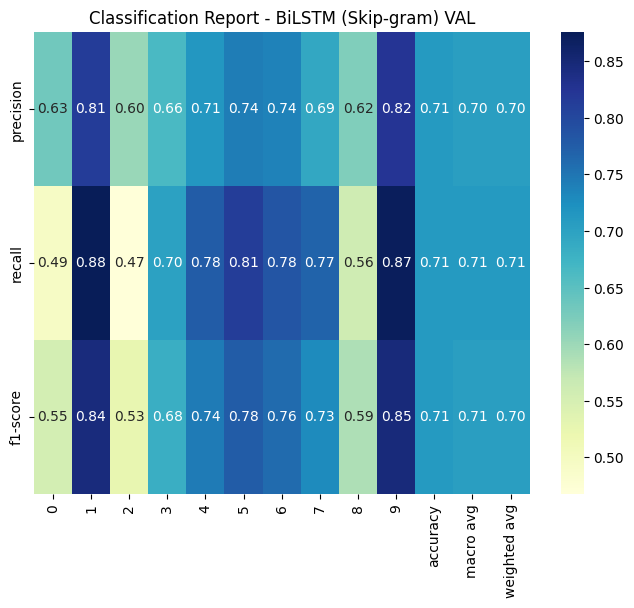

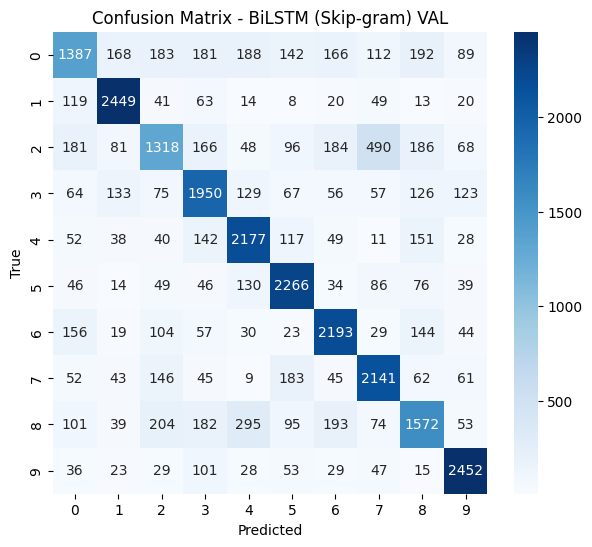

BiLSTM (Skip-gram) TEST | Accuracy: 0.7097 | F1 (Weighted): 0.7037


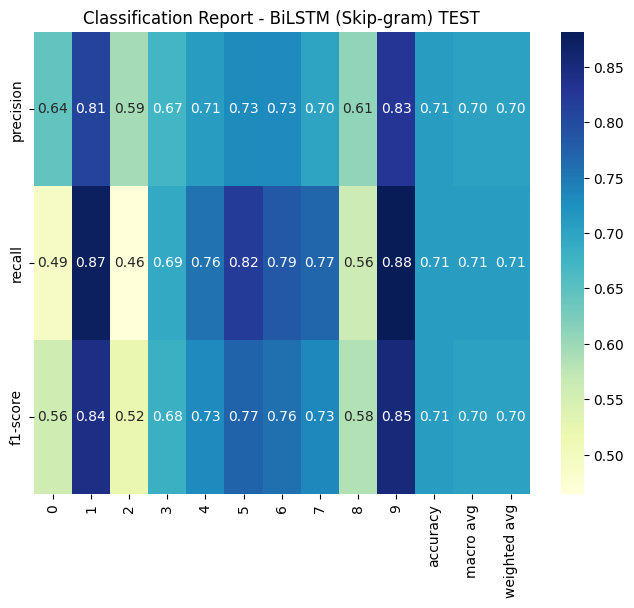

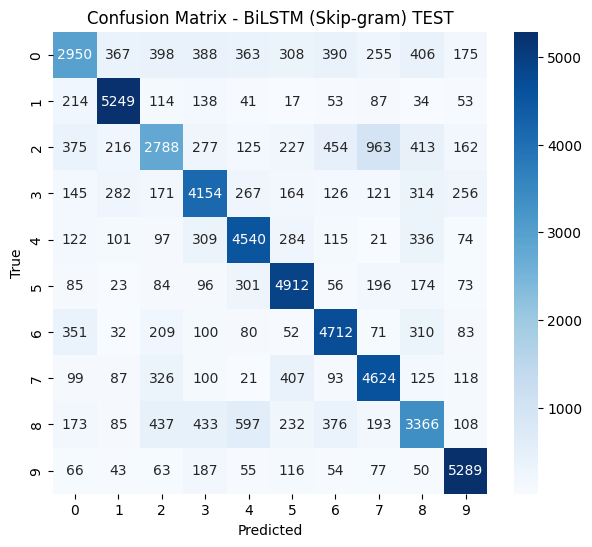

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │    87,016,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,822,948 (335.02 MB)

 Trainable params: 268,682 (1.02 MB)

 Non-trainable params: 87,016,900 (331.94 MB)

 Optimizer params: 537,366 (2.05 MB)

None


In [27]:
print("\n=== Bidirectional LSTM with Skip-gram ===")

model = build_rnn_model(cell="lstm", bidirectional=True,
                        embedding_matrix=embedding_matrix_w2v,
                        maxlen=maxlen,
                        embedding_dim=embedding_matrix_w2v.shape[1],
                        num_classes=num_classes,
                        trainable=False)

model.fit(X_train_in, y_train,
          validation_data=(X_val_in, y_val),
          epochs=5, batch_size=256, verbose=2)

y_val_pred = np.argmax(model.predict(X_val_in, verbose=0), axis=1)
evaluate_model(y_val, y_val_pred, model_name="BiLSTM (Skip-gram) VAL")

y_test_pred = np.argmax(model.predict(X_test_in, verbose=0), axis=1)
evaluate_model(y_test, y_test_pred, model_name="BiLSTM (Skip-gram) TEST")
print(model.summary())

# Result analysis

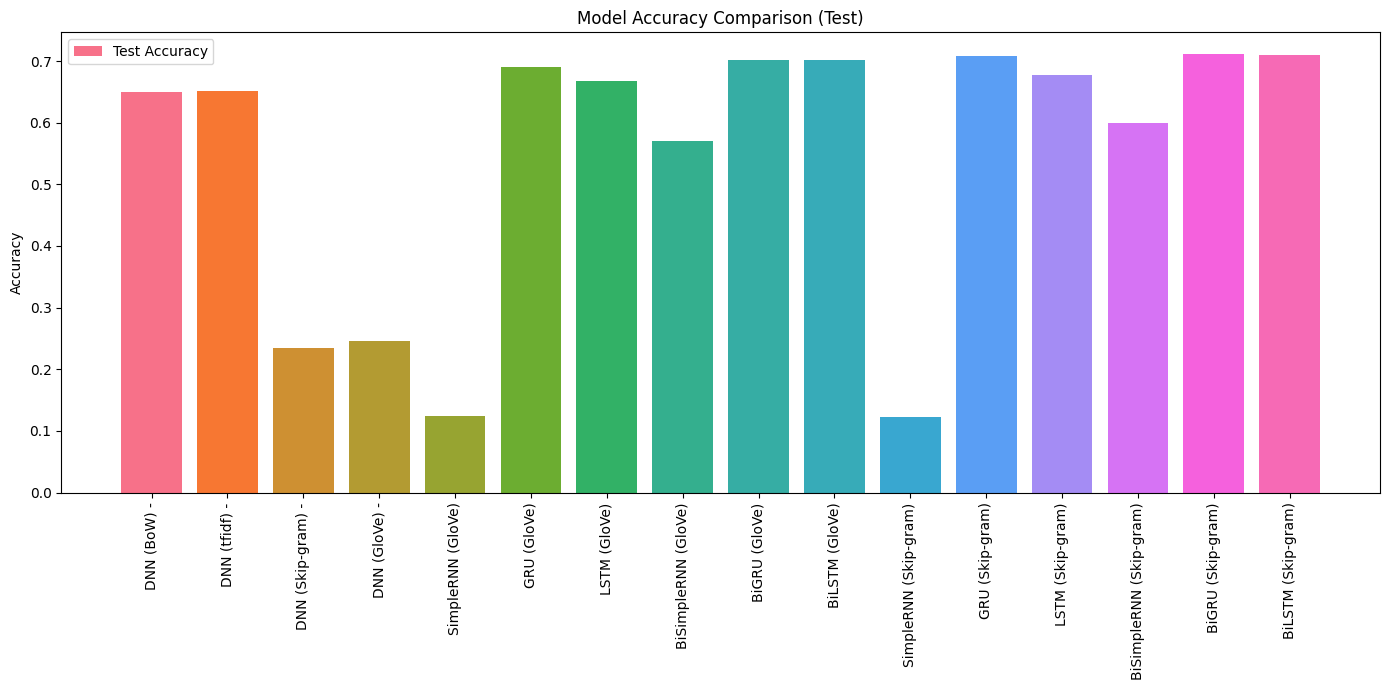

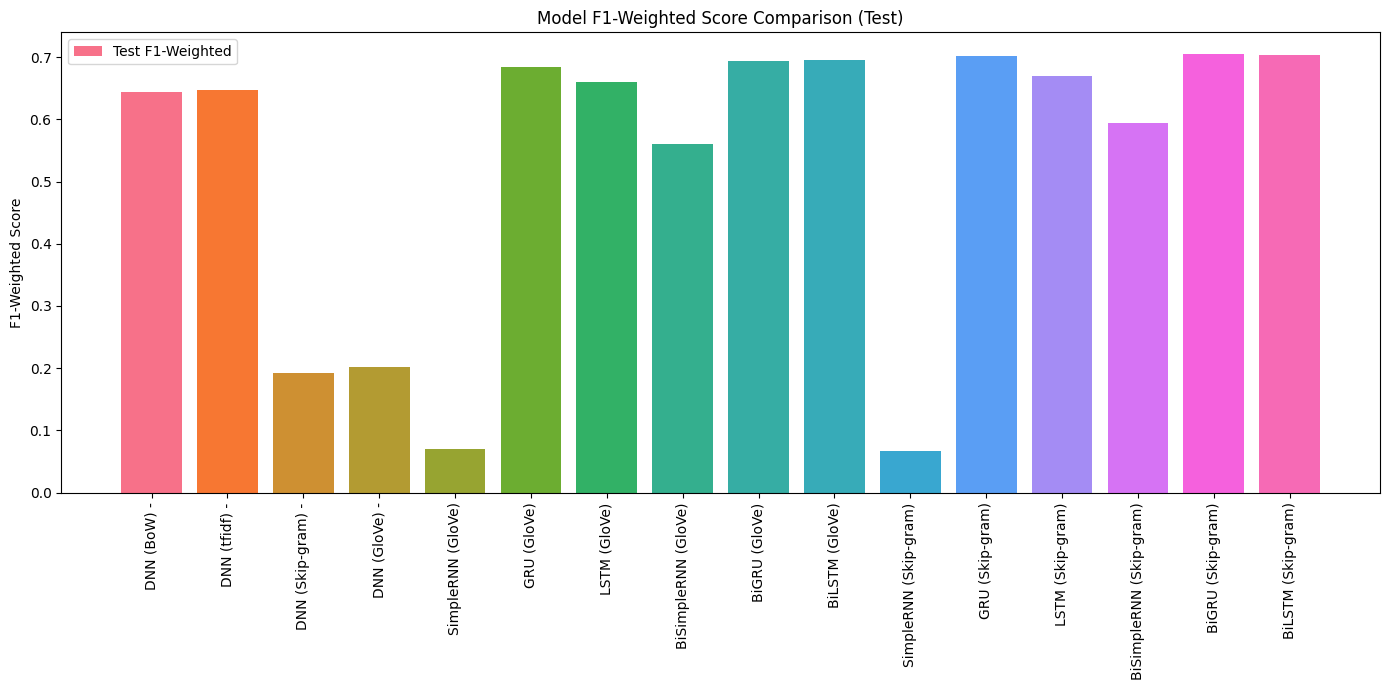

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Collect the results from your evaluation calls
results = []

# Logistic Regression
results.append({"model_name": "Logistic Regression val (BoW)", "accuracy": 0.6323, "f1_weighted": 0.6286})
results.append({"model_name": "Logistic Regression test (BoW)", "accuracy": 0.6290, "f1_weighted": 0.6248})
results.append({"model_name": "Logistic Regression val (TF-IDF)", "accuracy": 0.6475, "f1_weighted": 0.6451})
results.append({"model_name": "Logistic Regression test (TF-IDF)", "accuracy": 0.6475, "f1_weighted": 0.6451214162945157}) # Using the exact value from output

# Naive Bayes
results.append({"model_name": "Naive Bayes val (BoW)", "accuracy": 0.6262, "f1_weighted": 0.6231})
results.append({"model_name": "Naive Bayes test (BoW)", "accuracy": 0.6279, "f1_weighted": 0.6245})
results.append({"model_name": "Naive Bayes val (TF-IDF)", "accuracy": 0.6278, "f1_weighted": 0.6250})
results.append({"model_name": "Naive Bayes test (TF-IDF)", "accuracy": 0.6275, "f1_weighted": 0.6243549456306411}) # Using the exact value from output

# Random Forest
results.append({"model_name": "Random Forest val (BoW)", "accuracy": 0.5987, "f1_weighted": 0.5940})
results.append({"model_name": "Random Forest test (BoW)", "accuracy": 0.5956, "f1_weighted": 0.5910})
results.append({"model_name": "Random Forest val (TF-IDF)", "accuracy": 0.6016, "f1_weighted": 0.5966})
results.append({"model_name": "Random Forest test (TF-IDF)", "accuracy": 0.5990, "f1_weighted": 0.5940060883549125}) # Using the exact value from output

# DNN
results.append({"model_name": "DNN (BoW) - VALIDATION", "accuracy": 0.6507, "f1_weighted": 0.6452})
results.append({"model_name": "DNN (BoW) - TEST", "accuracy": 0.6499, "f1_weighted": 0.6445})
results.append({"model_name": "DNN (tfidf) - VALIDATION", "accuracy": 0.6538, "f1_weighted": 0.6491})
results.append({"model_name": "DNN (tfidf) - TEST", "accuracy": 0.6513, "f1_weighted": 0.6465})
results.append({"model_name": "DNN (Skip-gram) - VALIDATION", "accuracy": 0.2319, "f1_weighted": 0.1905})
results.append({"model_name": "DNN (Skip-gram) - TEST", "accuracy": 0.2342, "f1_weighted": 0.1925})
results.append({"model_name": "DNN (GloVe) - VALIDATION", "accuracy": 0.2439, "f1_weighted": 0.1990})
results.append({"model_name": "DNN (GloVe) - TEST", "accuracy": 0.2462, "f1_weighted": 0.2015})


# RNN (GloVe)
results.append({"model_name": "SimpleRNN (GloVe) VAL", "accuracy": 0.1246, "f1_weighted": 0.0724})
results.append({"model_name": "SimpleRNN (GloVe) TEST", "accuracy": 0.1244, "f1_weighted": 0.0703})
results.append({"model_name": "GRU (GloVe) VAL", "accuracy": 0.6919, "f1_weighted": 0.6845})
results.append({"model_name": "GRU (GloVe) TEST", "accuracy": 0.6912, "f1_weighted": 0.6841})
results.append({"model_name": "LSTM (GloVe) VAL", "accuracy": 0.6710, "f1_weighted": 0.6627})
results.append({"model_name": "LSTM (GloVe) TEST", "accuracy": 0.6680, "f1_weighted": 0.6594})
results.append({"model_name": "BiSimpleRNN (GloVe) VAL", "accuracy": 0.5709, "f1_weighted": 0.5600})
results.append({"model_name": "BiSimpleRNN (GloVe) TEST", "accuracy": 0.5711, "f1_weighted": 0.5603})
results.append({"model_name": "BiGRU (GloVe) VAL", "accuracy": 0.7036, "f1_weighted": 0.6972})
results.append({"model_name": "BiGRU (GloVe) TEST", "accuracy": 0.7014, "f1_weighted": 0.6946})
results.append({"model_name": "BiLSTM (GloVe) VAL", "accuracy": 0.7035, "f1_weighted": 0.6961})
results.append({"model_name": "BiLSTM (GloVe) TEST", "accuracy": 0.7021, "f1_weighted": 0.6948})


# RNN (Skip-gram)
results.append({"model_name": "SimpleRNN (Skip-gram) VAL", "accuracy": 0.1232, "f1_weighted": 0.0671})
results.append({"model_name": "SimpleRNN (Skip-gram) TEST", "accuracy": 0.1224, "f1_weighted": 0.0660})
results.append({"model_name": "GRU (Skip-gram) VAL", "accuracy": 0.7096, "f1_weighted": 0.7036})
results.append({"model_name": "GRU (Skip-gram) TEST", "accuracy": 0.7080, "f1_weighted": 0.7022})
results.append({"model_name": "LSTM (Skip-gram) VAL", "accuracy": 0.6784, "f1_weighted": 0.6703})
results.append({"model_name": "LSTM (Skip-gram) TEST", "accuracy": 0.6773, "f1_weighted": 0.6694})
results.append({"model_name": "BiSimpleRNN (Skip-gram) VAL", "accuracy": 0.5998, "f1_weighted": 0.5947})
results.append({"model_name": "BiSimpleRNN (Skip-gram) TEST", "accuracy": 0.6001, "f1_weighted": 0.5945})
results.append({"model_name": "BiGRU (Skip-gram) VAL", "accuracy": 0.7118, "f1_weighted": 0.7057})
results.append({"model_name": "BiGRU (Skip-gram) TEST", "accuracy": 0.7111, "f1_weighted": 0.7047})
results.append({"model_name": "BiLSTM (Skip-gram) VAL", "accuracy": 0.7109, "f1_weighted": 0.7050})
results.append({"model_name": "BiLSTM (Skip-gram) TEST", "accuracy": 0.7097, "f1_weighted": 0.7037})


# Filter results to include only test scores
test_results = [r for r in results if 'TEST' in r['model_name']]
results_df = pd.DataFrame(test_results)

# Clean up model names for plotting
results_df['model_name'] = results_df['model_name'].str.replace(' TEST', '')

# Get unique model names to assign colors
model_names = results_df['model_name'].unique()
colors = sns.color_palette('husl', len(model_names))
color_map = dict(zip(model_names, colors))

# Plotting Accuracy
plt.figure(figsize=(14, 7))
bars = plt.bar(results_df['model_name'], results_df['accuracy'], color=[color_map[name] for name in results_df['model_name']], label='Test Accuracy')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Test)')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting F1-Weighted Score
plt.figure(figsize=(14, 7))
bars = plt.bar(results_df['model_name'], results_df['f1_weighted'], color=[color_map[name] for name in results_df['model_name']], label='Test F1-Weighted')
plt.xticks(rotation=90)
plt.ylabel('F1-Weighted Score')
plt.title('Model F1-Weighted Score Comparison (Test)')
plt.legend()
plt.tight_layout()
plt.show()

## Worst Performing Models Comparison

Based on the test set results, the worst performing Machine Learning model is **Random Forest with BoW** and the worst performing Neural Network model is **SimpleRNN with Skip-gram**.

Here is a summary of their performance metrics:

| Model                         | Accuracy | F1 Weighted |
|-------------------------------|----------|-------------|
| Random Forest (BoW)           | 0.5956   | 0.5910      |
| SimpleRNN (Skip-gram)         | 0.1224   | 0.0660      |

**Discussion:**

*   **Performance:** Both the Random Forest with BoW and SimpleRNN with Skip-gram models show significantly lower performance compared to the best models. The SimpleRNN with Skip-gram performs particularly poorly, with accuracy and F1-weighted scores near random chance (0.1 for 10 classes).
*   **Feature Representation:** The poor performance of Random Forest with BoW might indicate that a simple Bag-of-Words representation is not sufficient for this task when used with a Random Forest classifier. The SimpleRNN's low performance, even with Skip-gram embeddings, suggests that a basic unidirectional RNN might not be capable of capturing the necessary context and long-range dependencies in the text data for effective classification.
*   **Model Architecture:** SimpleRNNs are known to struggle with capturing long-term dependencies due to the vanishing gradient problem. While pre-trained embeddings can help to some extent, the architecture itself might be a limiting factor for this dataset. The Random Forest's performance could be improved with hyperparameter tuning or by using more sophisticated text representations like TF-IDF or word embeddings.

**Conclusion:**

The Random Forest with BoW and SimpleRNN with Skip-gram models are the worst performers in their respective categories. This highlights the importance of choosing appropriate model architectures and text representation techniques for the specific characteristics of the dataset and the task at hand. More complex RNN architectures like GRU and LSTM, especially when used bidirectionally and with effective word embeddings, are better suited for capturing the nuances of sequential text data.

## Best Performing Models Comparison

Based on the test set results, the best performing Machine Learning model is **Logistic Regression with TF-IDF** and the best performing Neural Network model is **BiGRU with Skip-gram**.

Here is a summary of their performance metrics:

| Model                              | Accuracy | F1 Weighted |
|------------------------------------|----------|-------------|
| Logistic Regression (TF-IDF)       | 0.6475   | 0.6451      |
| BiGRU (Skip-gram)                   | 0.7111   | 0.7047      |

**Discussion:**

*   **Performance:** The BiGRU model with Skip-gram embeddings significantly outperforms the Logistic Regression model with TF-IDF on both accuracy and weighted F1-score. This suggests that the neural network model is better able to capture complex patterns and relationships in the text data compared to the simpler linear model.
*   **Feature Representation:** Logistic Regression and Naive Bayes models relied on simpler Bag-of-Words and TF-IDF representations, which treat text as a collection of independent words. RNN models, particularly the bidirectional ones like BiGRU and BiLSTM, can capture the sequential nature of text and contextual information through word embeddings (GloVe and Skip-gram). The superior performance of the RNN models indicates the importance of considering word order and context for this task.
*   **Model Complexity:** Neural networks, especially recurrent ones, are more complex models with a higher number of parameters compared to traditional machine learning models like Logistic Regression and Naive Bayes. This complexity allows them to learn more intricate representations of the data, which can lead to better performance on complex tasks like text classification.
*   **Computational Cost:** Training neural networks is generally more computationally expensive and time-consuming than training traditional machine learning models. However, given the performance improvement, this trade-off might be acceptable depending on the application's requirements.
*   **Embeddings:** Within the neural network models, those using GloVe and Skip-gram embeddings performed significantly better than the simple RNN models. This highlights the importance of using pre-trained word embeddings or learning effective embeddings during training to capture semantic relationships between words. The bidirectional models (BiGRU and BiLSTM) generally performed better than their unidirectional counterparts, suggesting that considering context from both directions in the sequence is beneficial.

**Conclusion:**

For this text classification task, Neural Network models, specifically the BiGRU model with Skip-gram embeddings, demonstrate superior performance compared to the traditional Machine Learning models. This is likely due to their ability to capture more complex patterns and utilize rich word representations that incorporate semantic and contextual information. While more computationally expensive, the performance gains justify the use of neural networks for this problem.